In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 


import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder # import


import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\hites\Downloads\Grades.csv')

In [4]:
df.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [6]:
df.tail()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[5 rows x 43 columns]

In [7]:
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

# EDA(Exploratory data analysis)

In [8]:
df.shape

(571, 43)

In [9]:
df.describe()

CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000

In [10]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [11]:
#check out the data types.

df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [13]:
#lets visualize it by using heatmap

<AxesSubplot:>

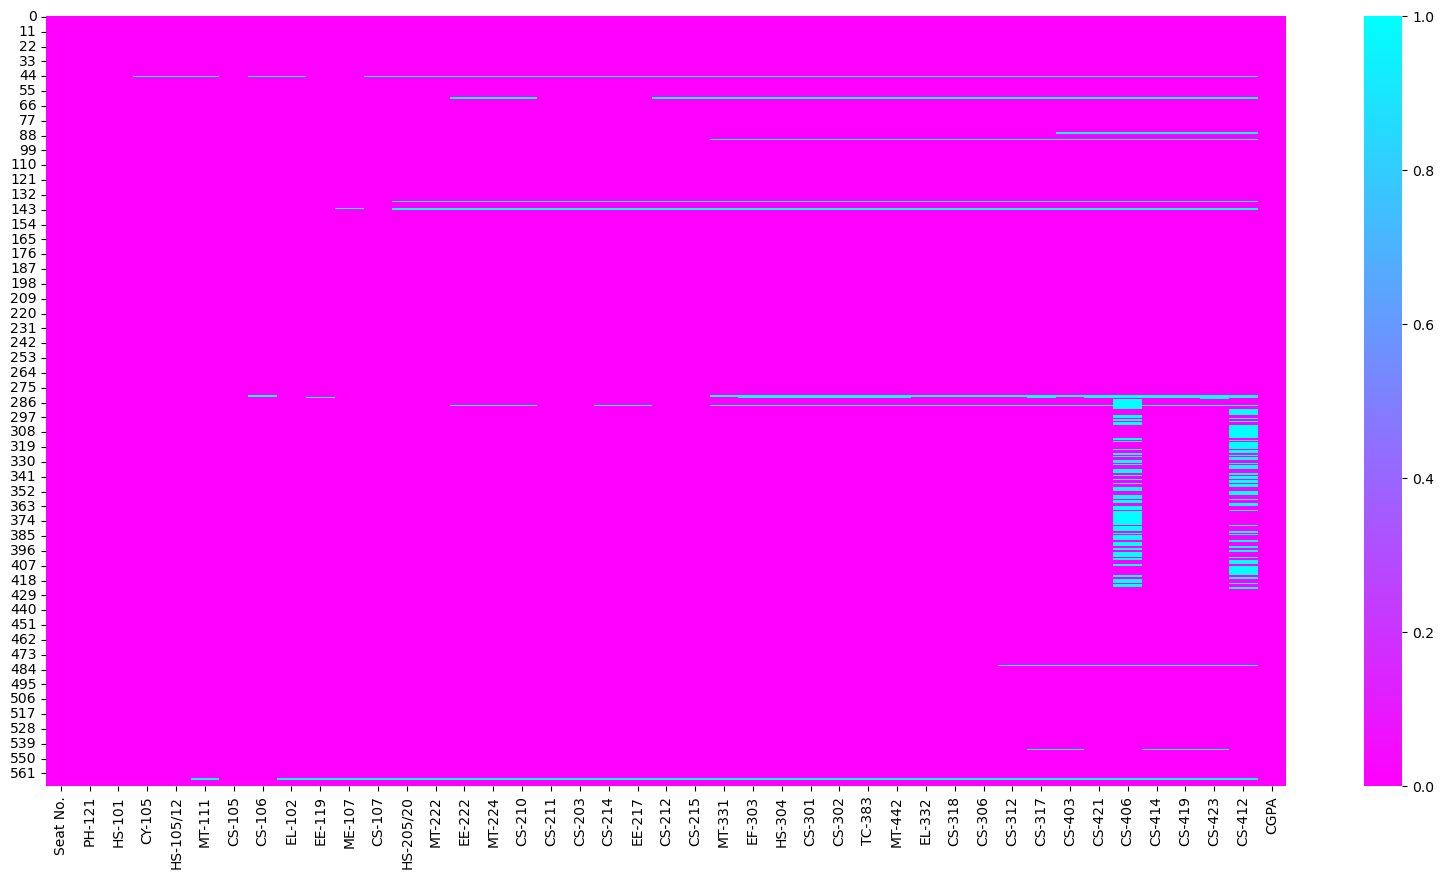

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cmap = "cool_r")

As we can observe that almost each columns has a null values.

We can also observe that in the CS-406 and CS-412 has too many null values.

For the more clarification we have to find out value count for each columns. 

In [15]:
#checking the total value count

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64


A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51

from here we can observe that data type is object and categorical data so we can use mode to fill the null values 

In [16]:
df['CY-105']=df['CY-105'].fillna('A')
df['HS-105/12']=df['HS-105/12'].fillna('A')
df['MT-111']=df['MT-111'].fillna('A-')
df['CS-106']=df['CS-106'].fillna('A-')
df['EL-102']=df['EL-102'].fillna('A-')
df['EE-119']=df['EE-119'].fillna('A-')
df['ME-107']=df['ME-107'].fillna('A-')
df['CS-107']=df['CS-107'].fillna('A')
df['HS-205/20']=df['HS-205/20'].fillna('A-')
df['MT-222']=df['MT-222'].fillna('A-')
df['EE-222']=df['EE-222'].fillna('A')
df['MT-224']=df['MT-224'].fillna('A-')
df['CS-210']=df['CS-210'].fillna('A-')
df['CS-211']=df['CS-211'].fillna('A-')
df['CS-203']=df['CS-203'].fillna('A-')
df['CS-214']=df['CS-214'].fillna('C')
df['EE-217']=df['EE-217'].fillna('A-')
df['CS-212']=df['CS-212'].fillna('A-')
df['CS-215']=df['CS-215'].fillna('A-')
df['MT-331']=df['MT-331'].fillna('A')
df['EF-303']=df['EF-303'].fillna('B')
df['HS-304']=df['HS-304'].fillna('A-')
df['CS-301']=df['CS-301'].fillna('A-')
df['CS-302']=df['CS-302'].fillna('A-')
df['TC-383']=df['TC-383'].fillna('A')
df['MT-442']=df['MT-442'].fillna('A-')
df['EL-332']=df['EL-332'].fillna('A-')
df['CS-318']=df['CS-318'].fillna('A-')
df['CS-306']=df['CS-306'].fillna('A-')
df['CS-312']=df['CS-312'].fillna('A+')
df['CS-317']=df['CS-317'].fillna('B-')
df['CS-403']=df['CS-403'].fillna('A')
df['CS-421']=df['CS-421'].fillna('B')
df['CS-406']=df['CS-406'].fillna('A-')
df['CS-414']=df['CS-414'].fillna('A')
df['CS-419']=df['CS-419'].fillna('A-')
df['CS-423']=df['CS-423'].fillna('A-')
df['CS-412']=df['CS-412'].fillna('A-')

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [19]:
df.shape

(571, 43)

In [20]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

<AxesSubplot:>

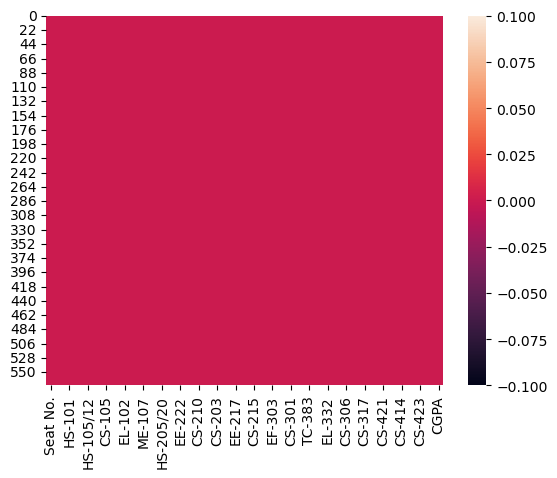

In [21]:
#visualize it by using heatmap after fillna

sns.heatmap(df.isnull())

As we observe all features or input columns are in object type and our target is in float type data.

Now we observe that there are no requirement of Seat number column so we should remove it.

In [22]:
df.drop(['Seat No.'],axis=1,inplace=True)
df.head()

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0     B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1      A      D     D+         D     B-      C      D      A     D+      D   
2      A      B      A        B-     B+      A     B-     B+     A-     A-   
3      D     C+     D+         D      D     A-     D+     C-      D     C+   
4     A-     A-     A-        B+      A      A     A-     B+      A     A-   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 42 columns]

In [23]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [24]:
uniques = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

for column in uniques:
    unique_values = df[column].unique()
    total_unique = len(unique_values)
    print(f"{column} = {unique_values} in this column has a total of {total_unique} unique values.\n")

PH-121 = ['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F'] in this column has a total of 13 unique values.

HS-101 = ['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F'] in this column has a total of 12 unique values.

CY-105 = ['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 'WU' 'A+' 'F'] in this column has a total of 13 unique values.

HS-105/12 = ['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 'WU' 'A+' 'F'] in this column has a total of 13 unique values.

MT-111 = ['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' 'A+' 'F' 'WU'] in this column has a total of 13 unique values.

CS-105 = ['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D'] in this column has a total of 11 unique values.

CS-106 = ['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' 'A+' 'F' 'WU'] in this column has a total of 13 unique values.

EL-102 = ['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' 'A+' 'WU' 'F'] in this column has a total of 13 unique values.

EE-119 = ['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+'

As we observe in above data there are in the manner of avarage 11 to 13 unique grades in each columns.

Now we done to check unique values of columns

# Univerate Data Analysis

PH-121


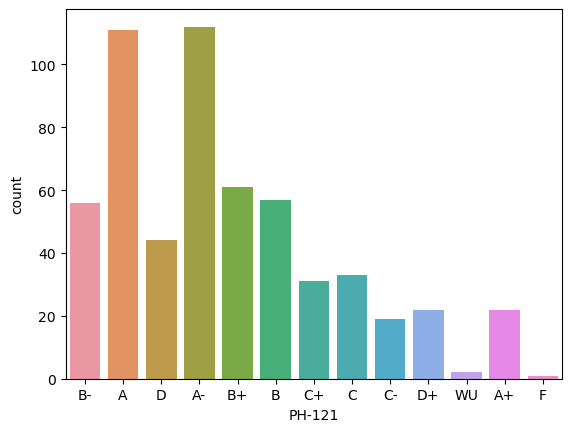

HS-101


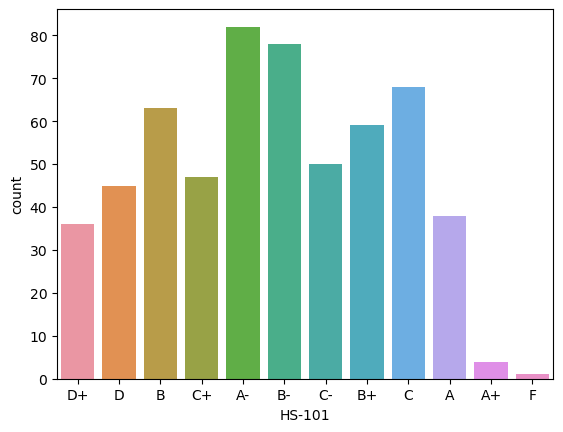

CY-105


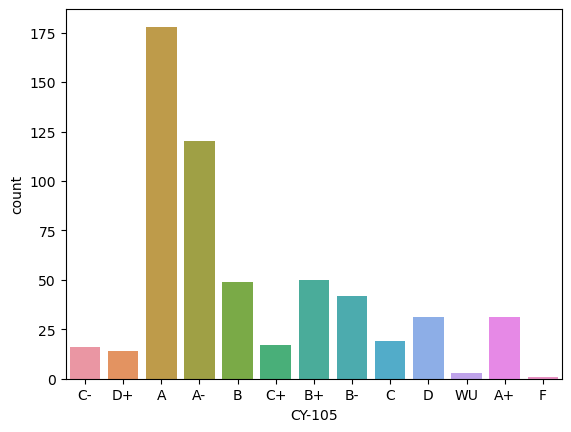

HS-105/12


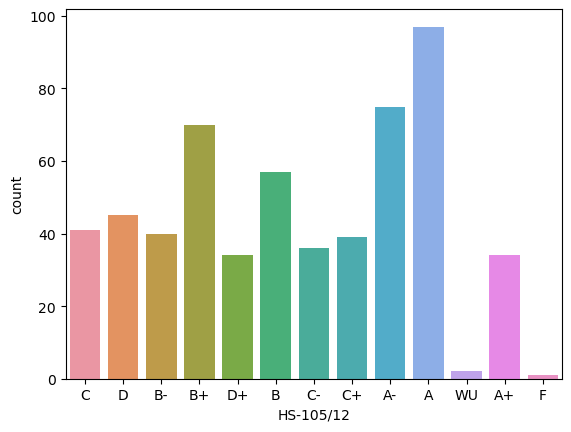

MT-111


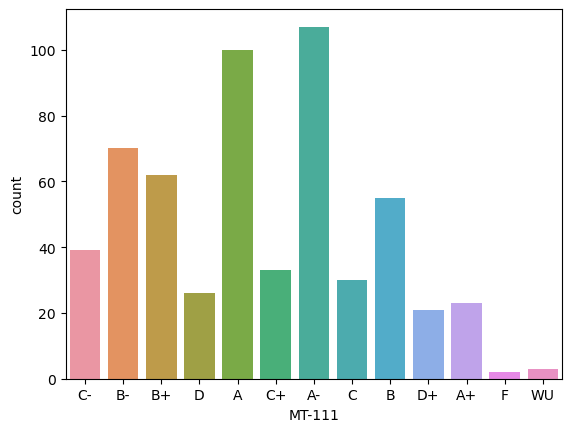

CS-105


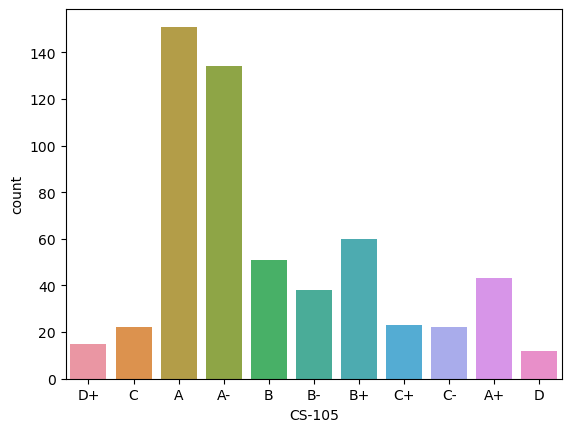

CS-106


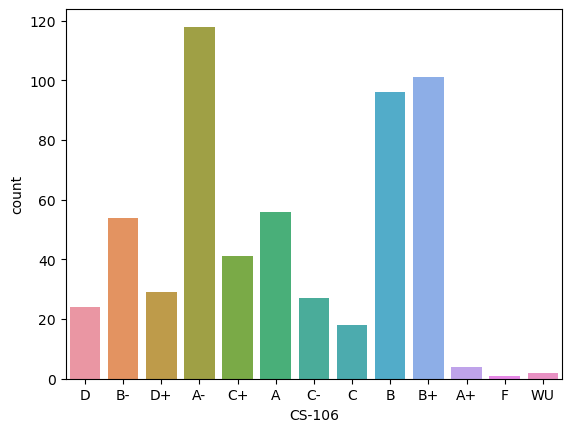

EL-102


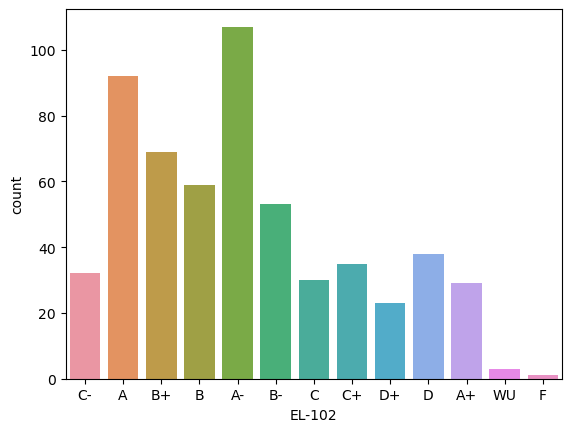

EE-119


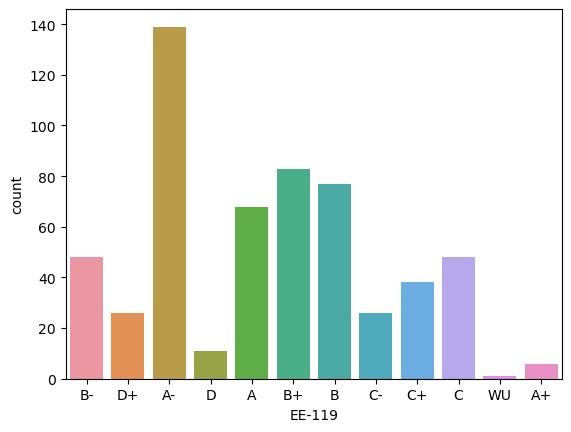

ME-107


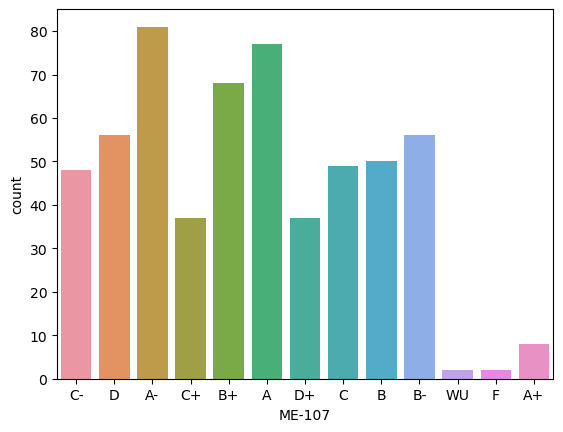

CS-107


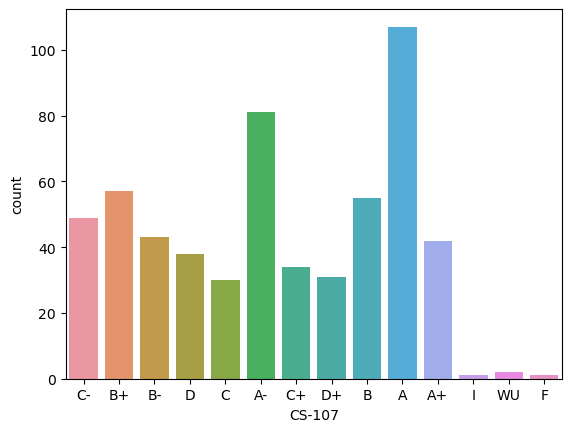

HS-205/20


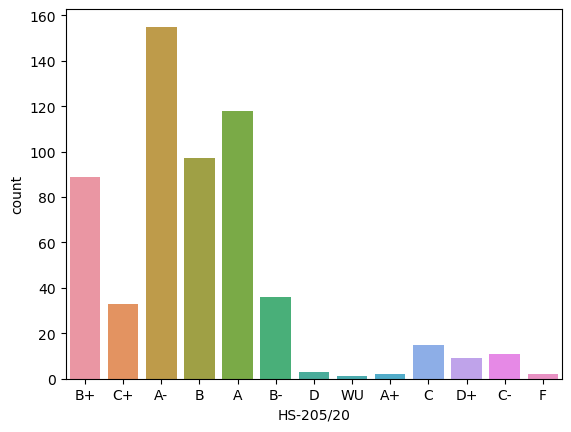

MT-222


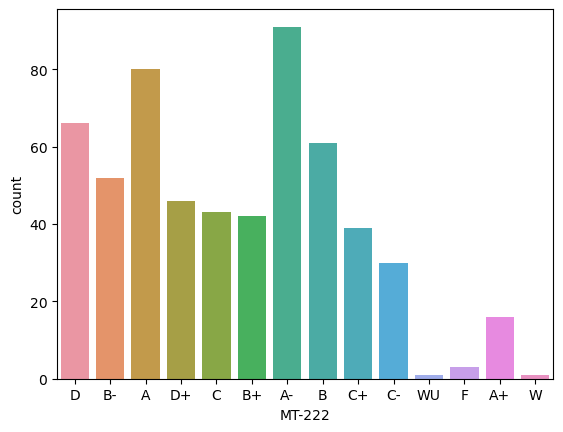

EE-222


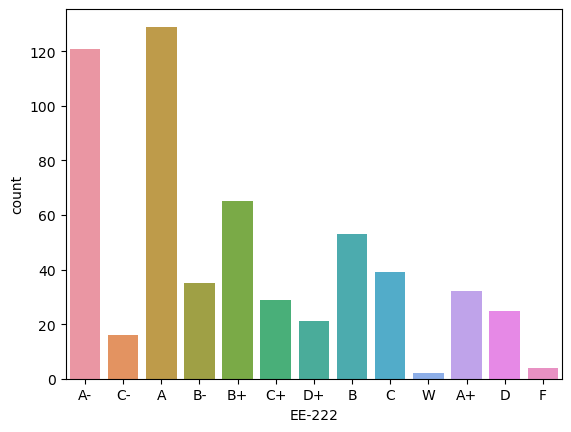

MT-224


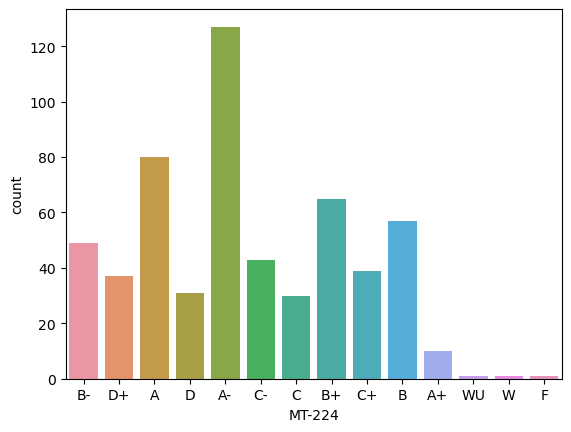

CS-210


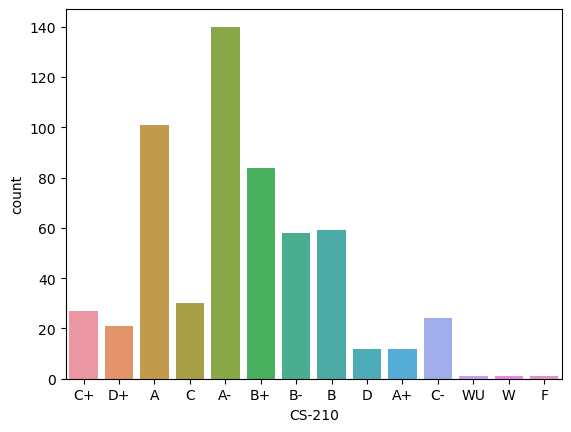

CS-211


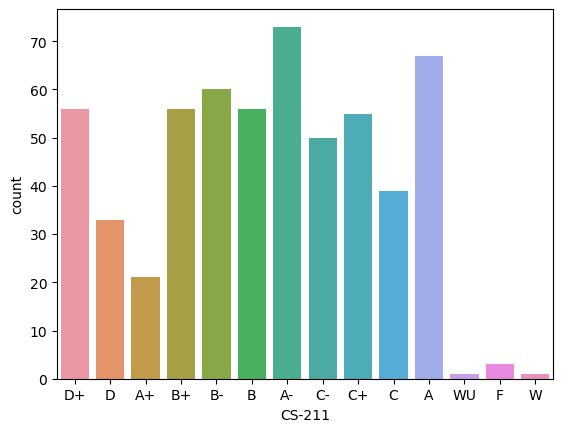

CS-203


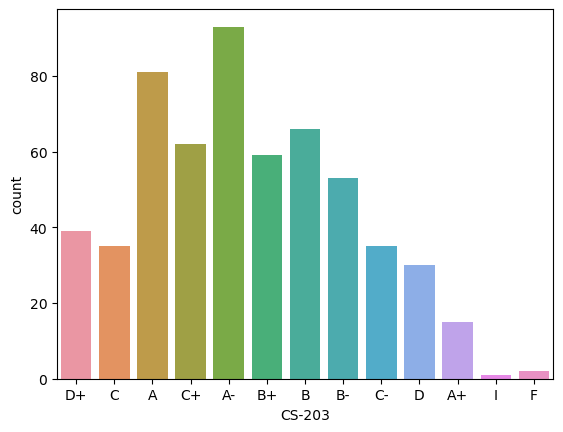

CS-214


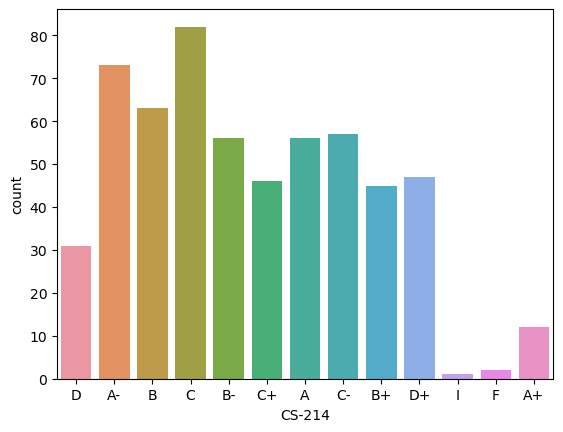

EE-217


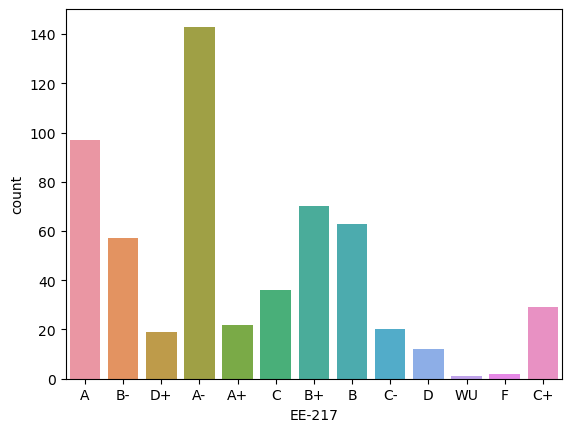

CS-212


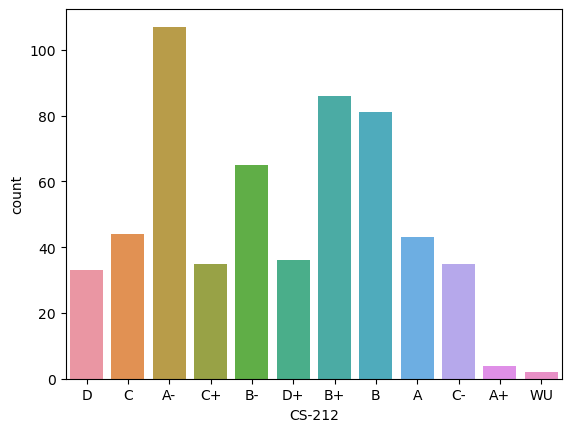

CS-215


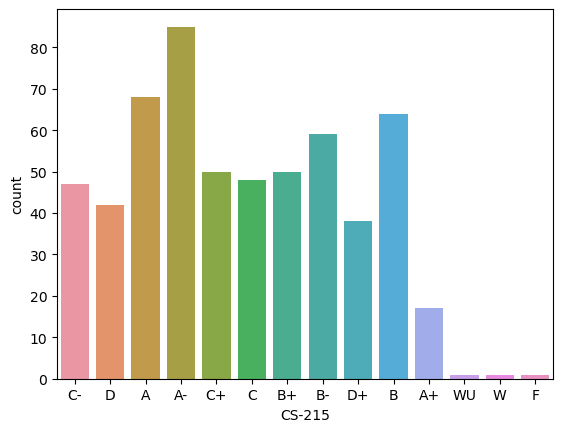

MT-331


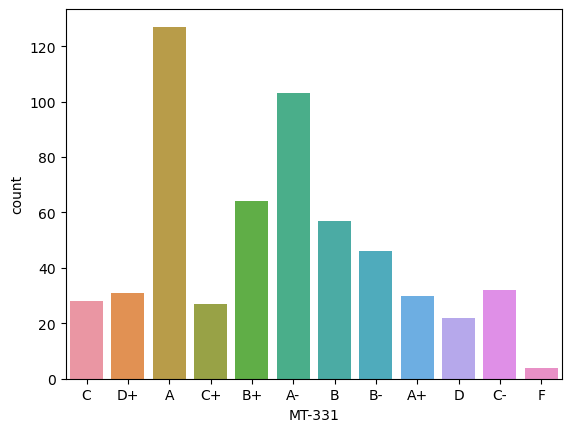

EF-303


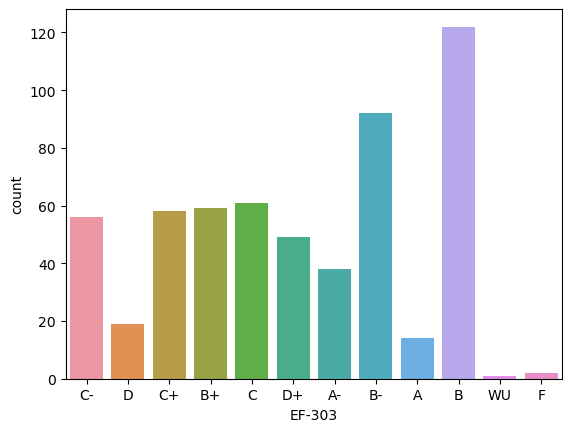

HS-304


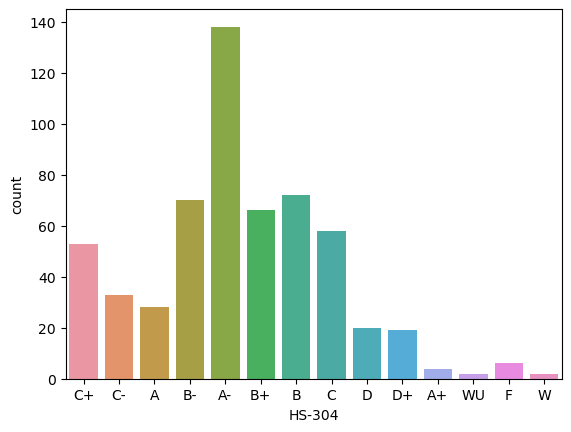

CS-301


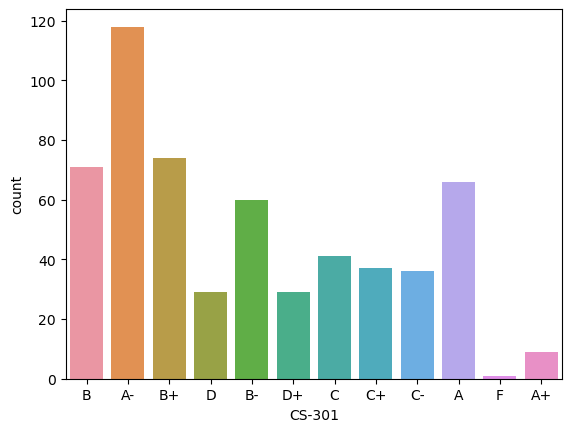

CS-302


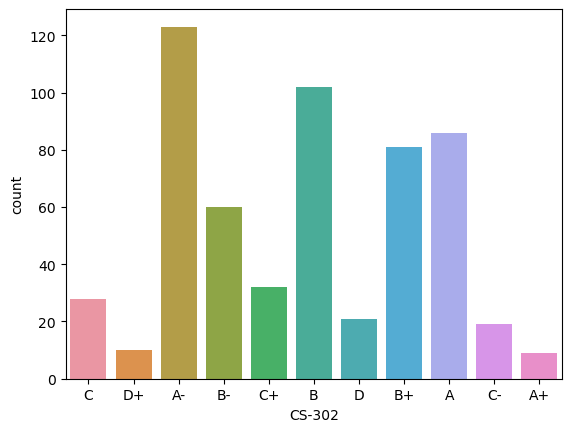

TC-383


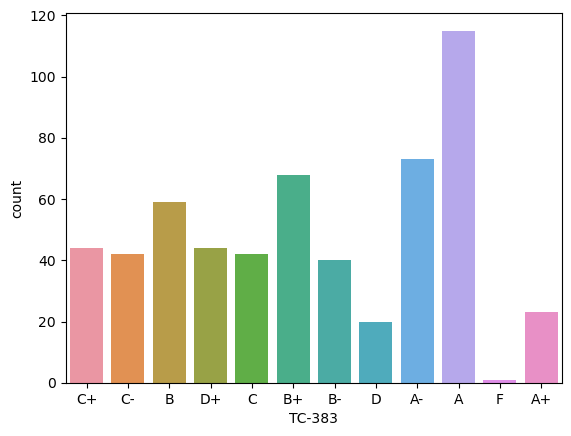

MT-442


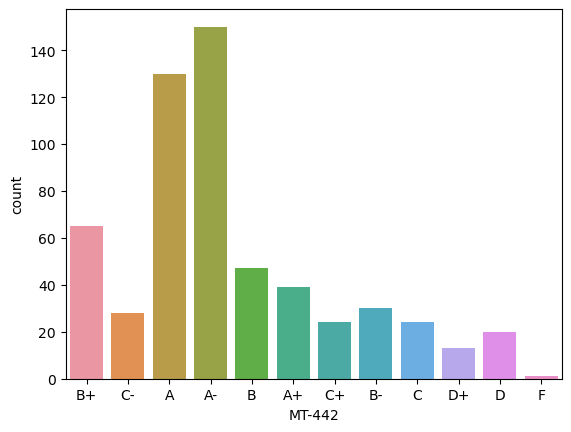

EL-332


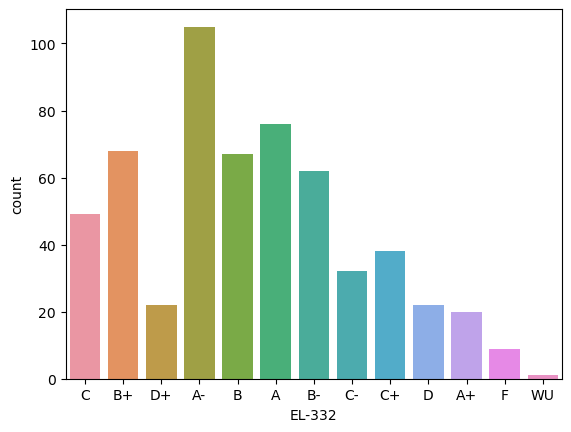

CS-318


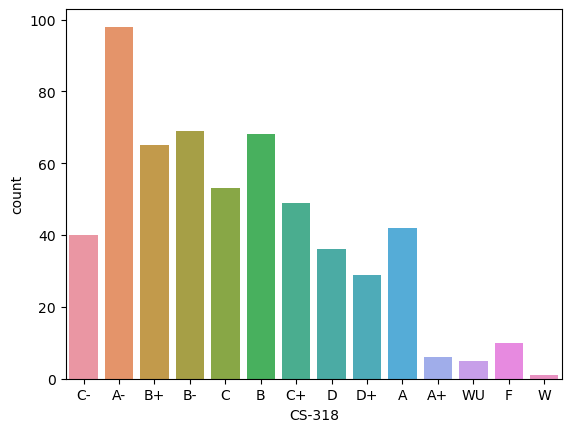

CS-306


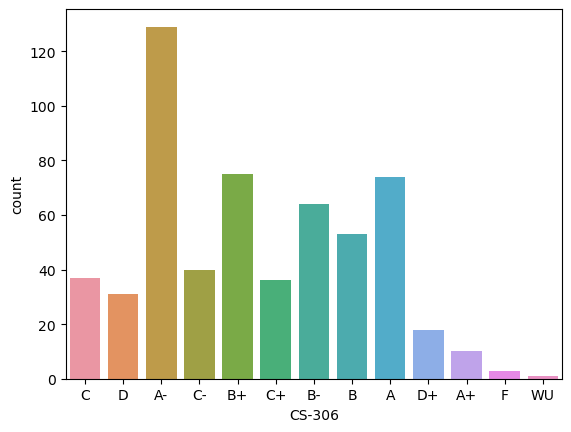

CS-312


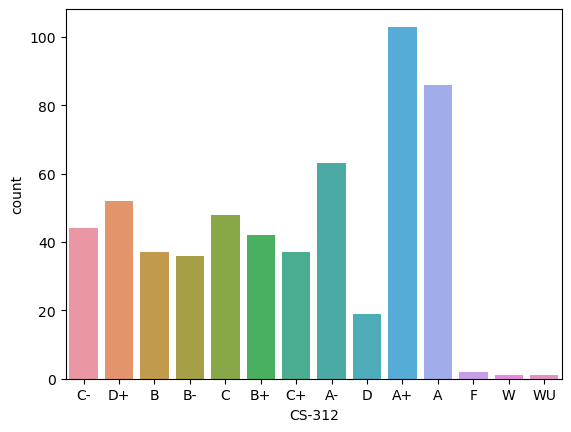

CS-317


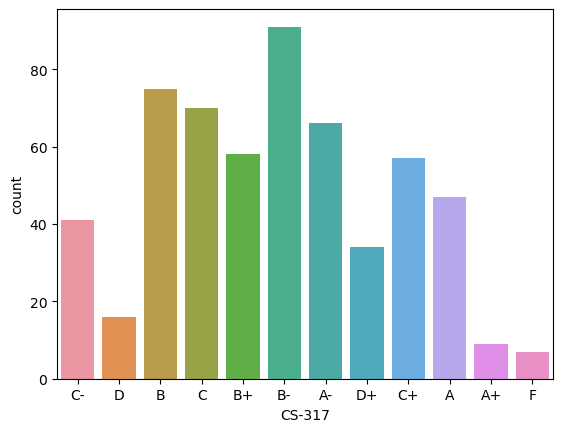

CS-403


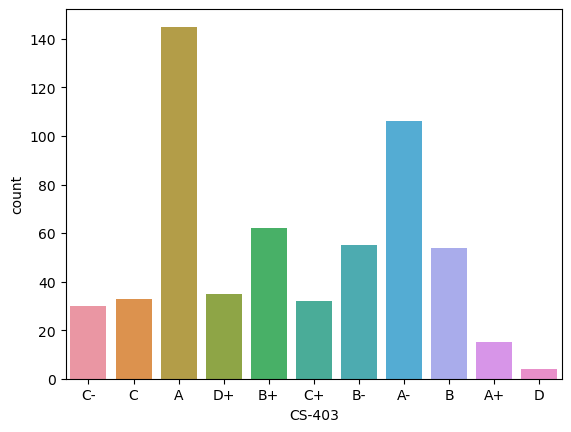

CS-421


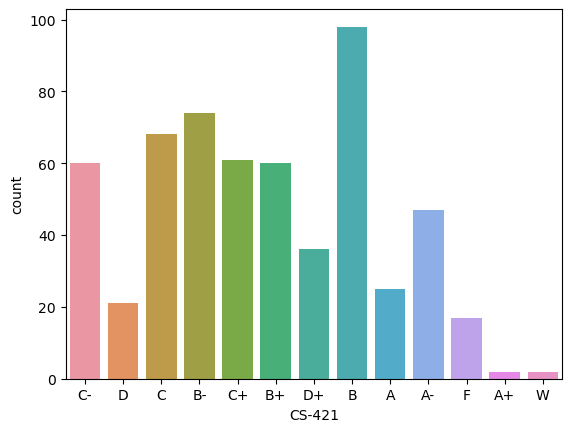

CS-406


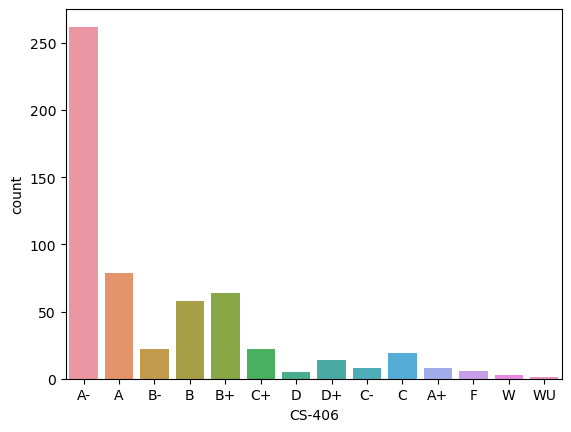

CS-414


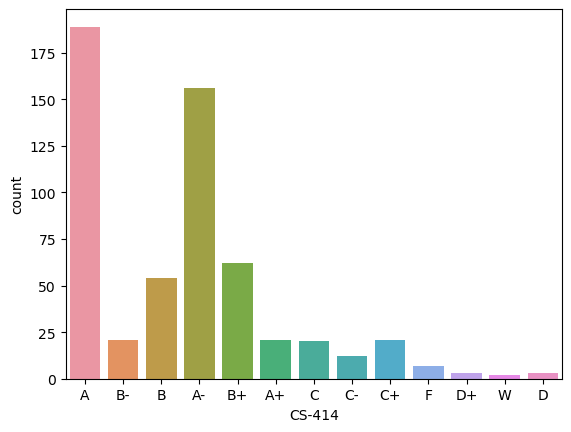

CS-419


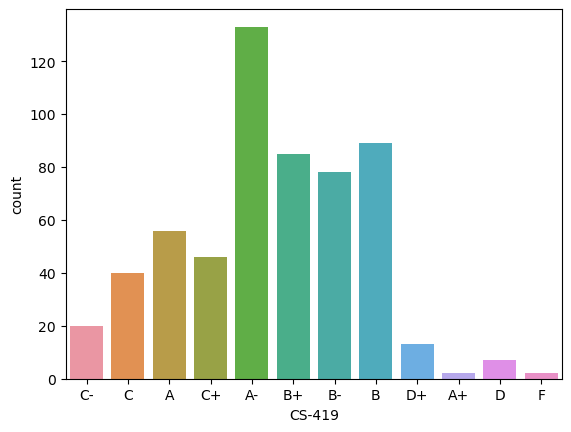

CS-423


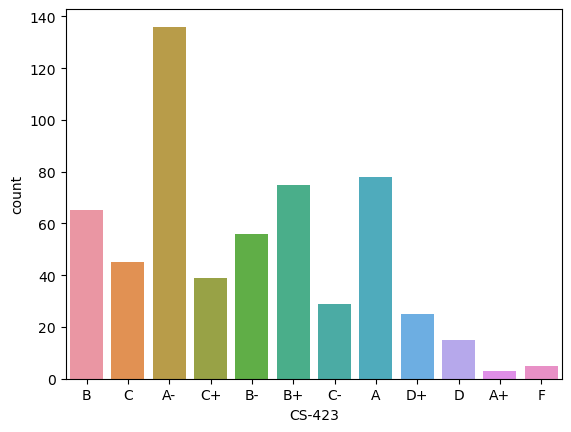

CS-412


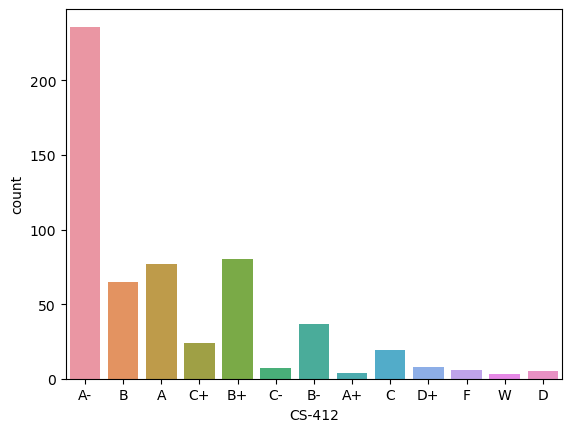

In [25]:
Count = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
         'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
         'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
         'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
         'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
         'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

for column in Count:
    print(column)
    sns.countplot(data=df, x=column)
    plt.show()

# We can observe more clear thorugh pie chart 

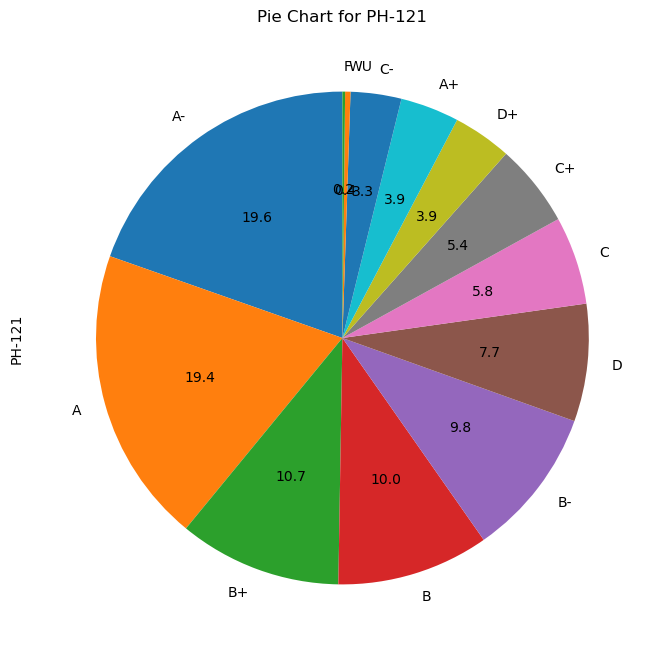

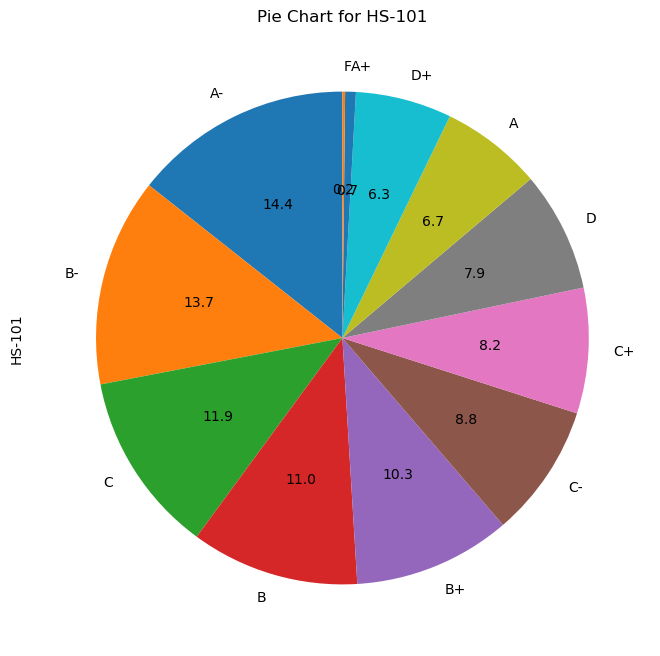

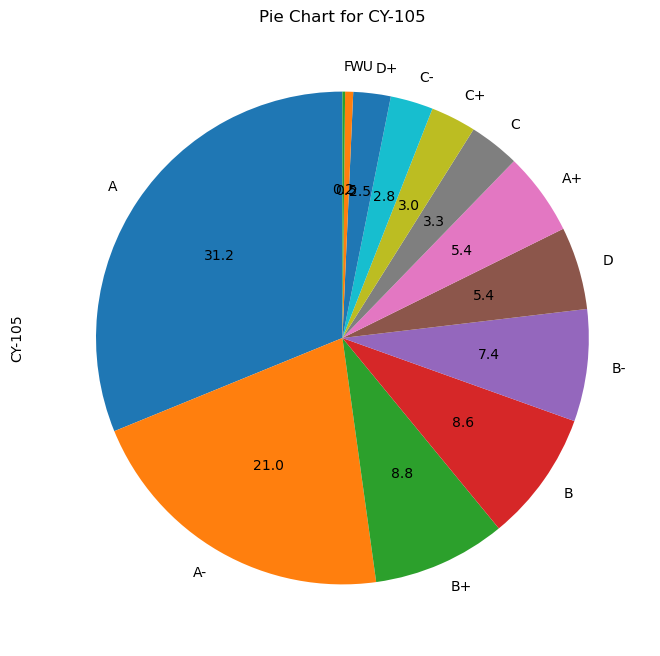

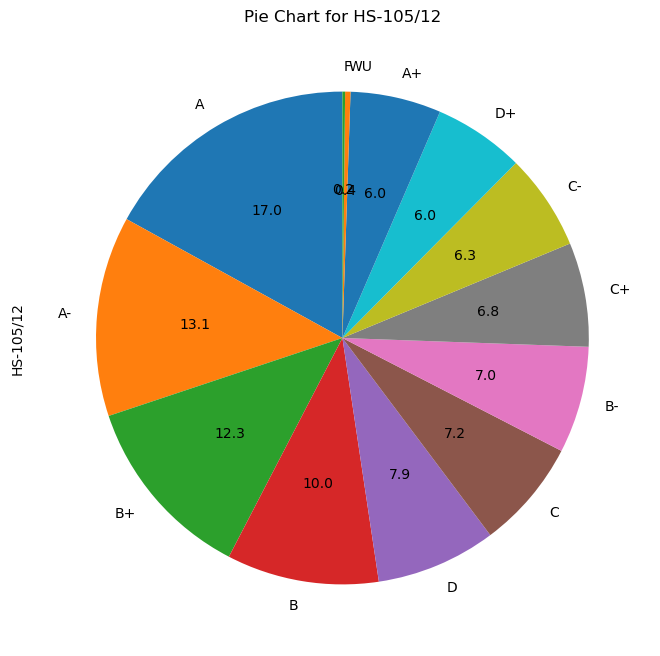

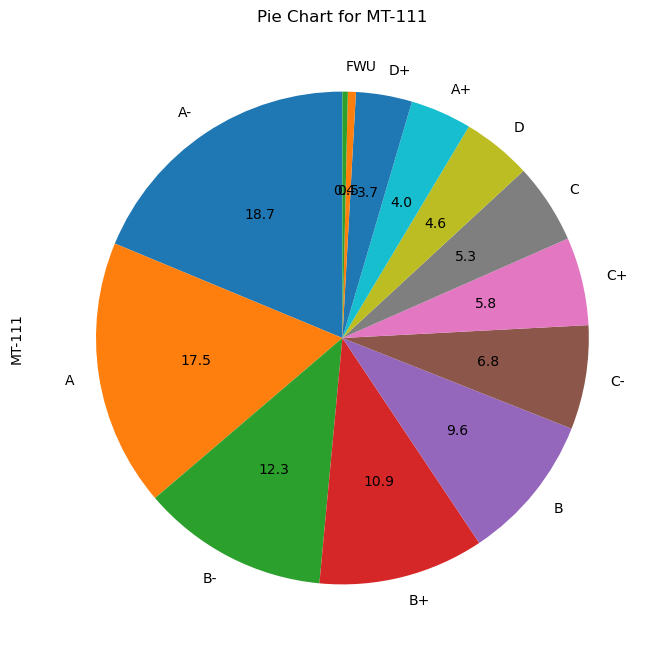

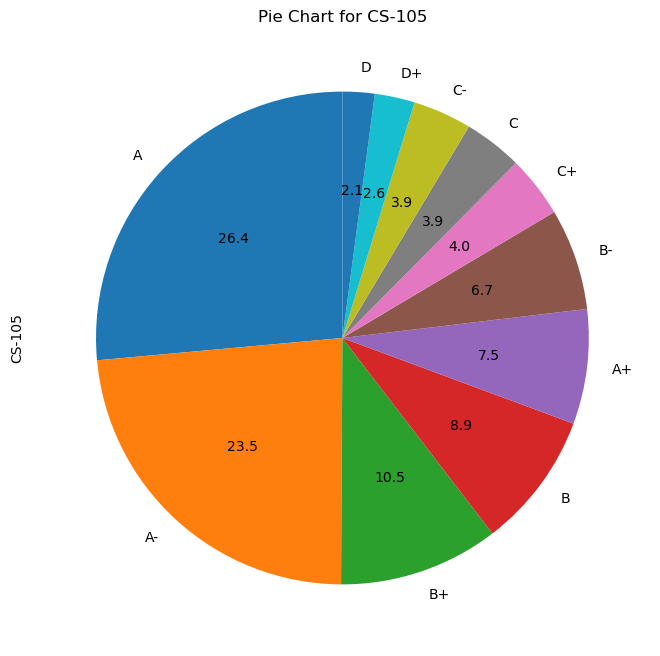

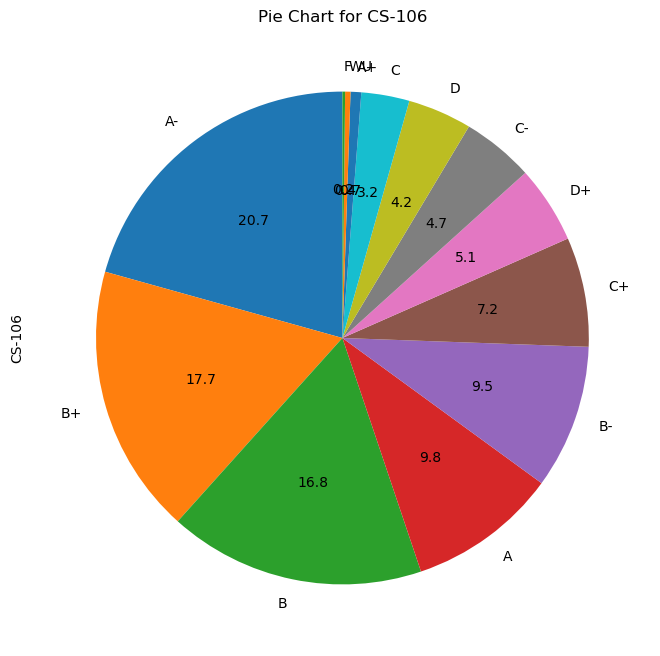

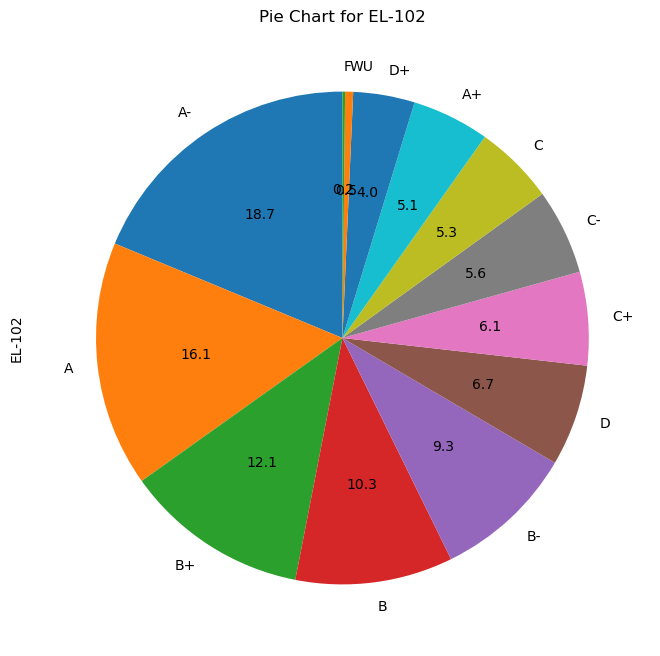

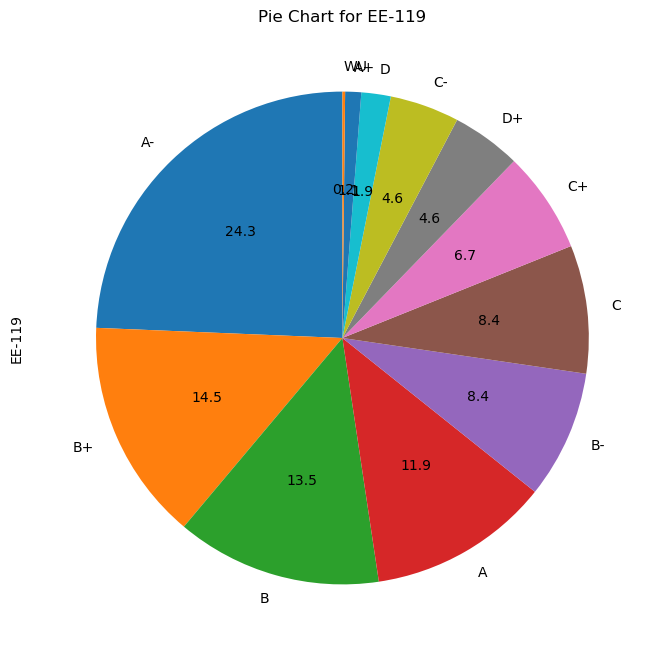

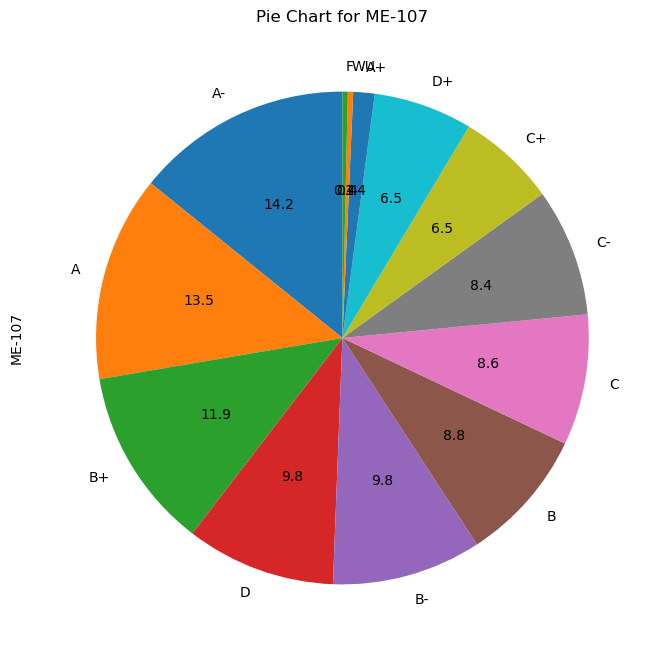

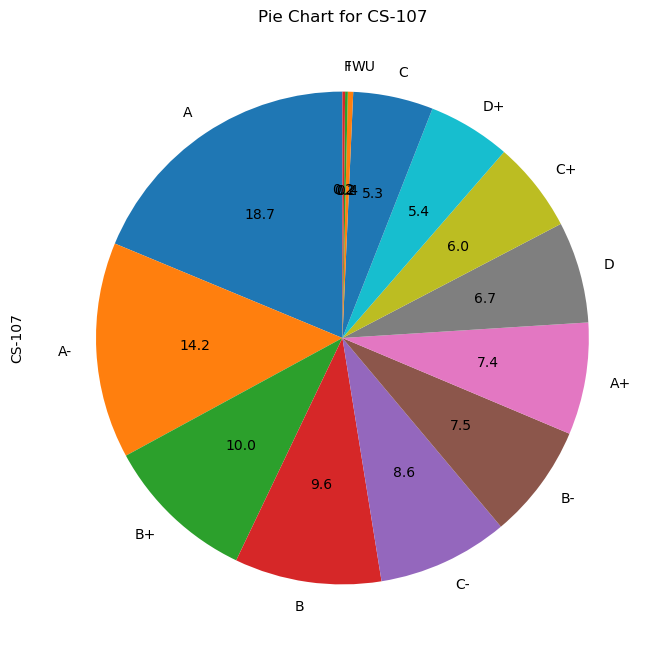

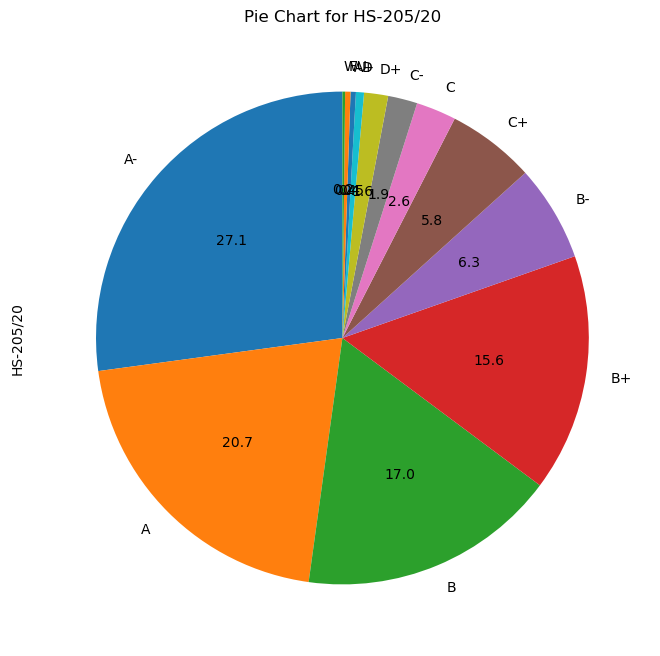

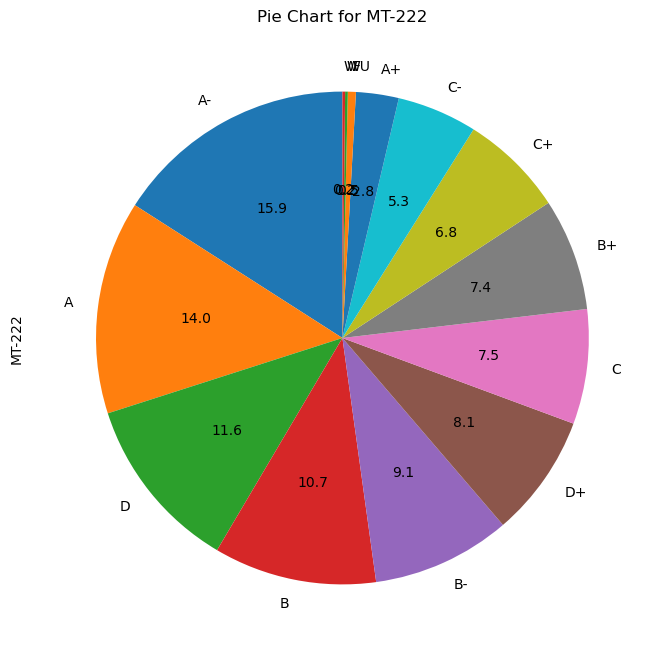

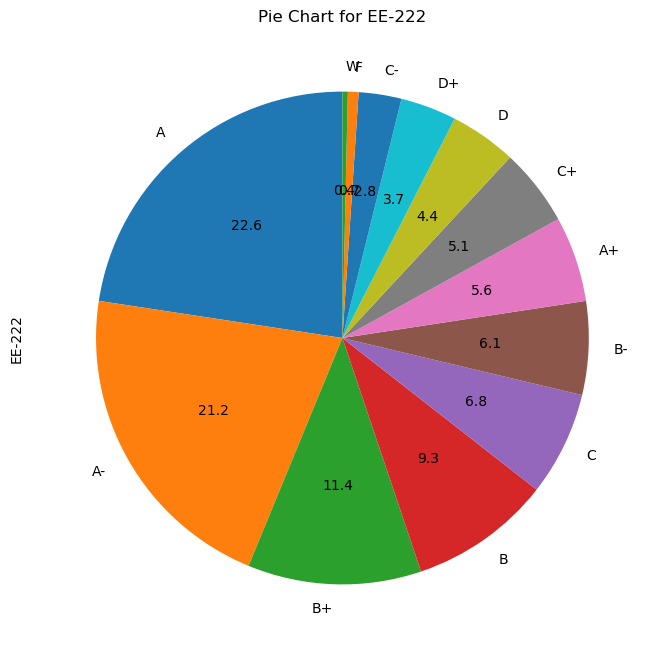

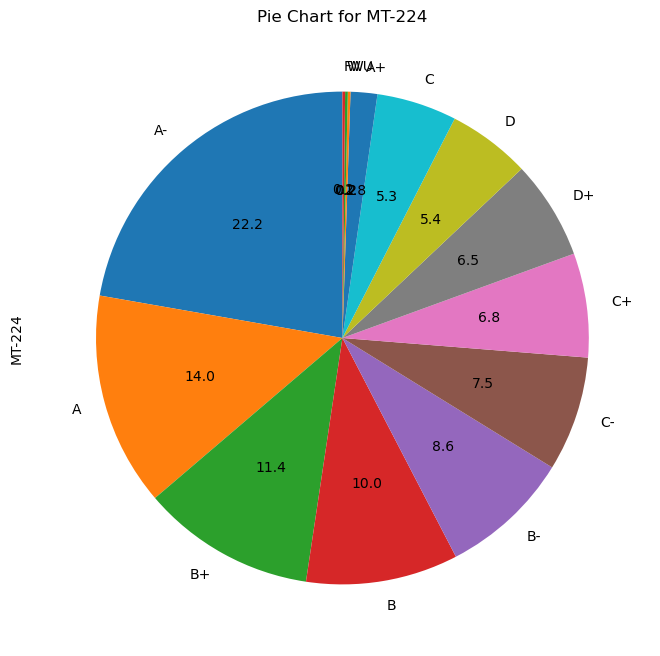

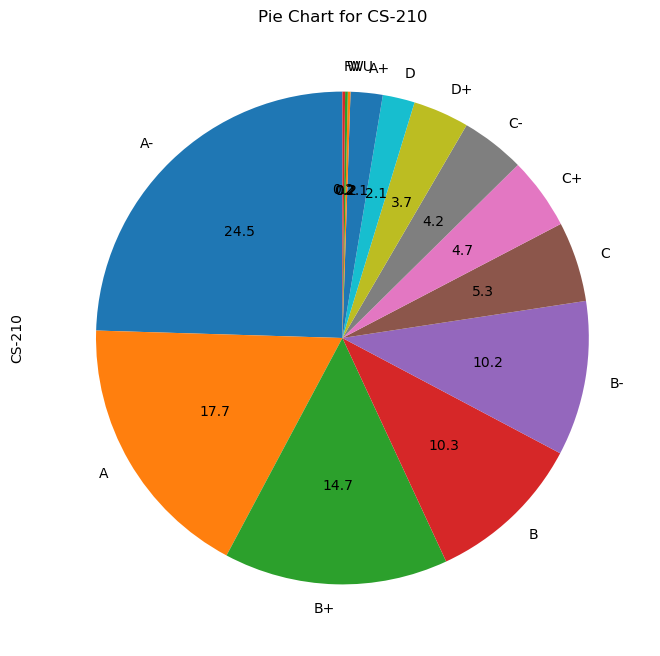

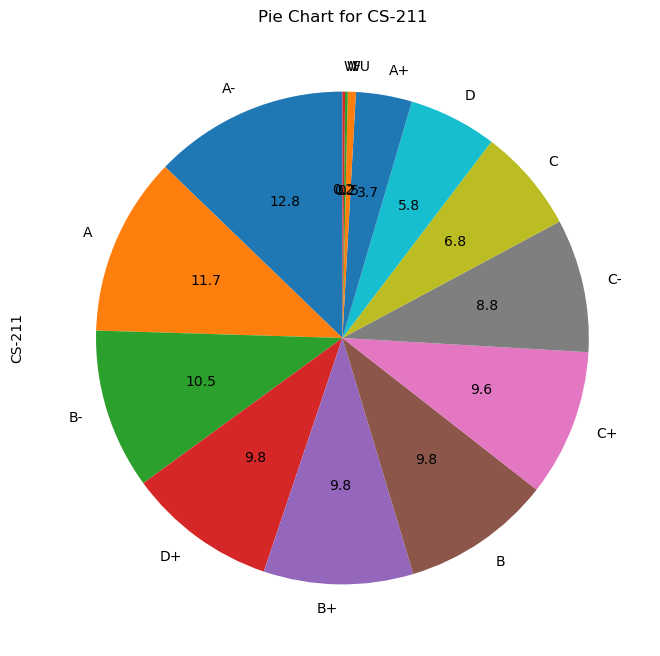

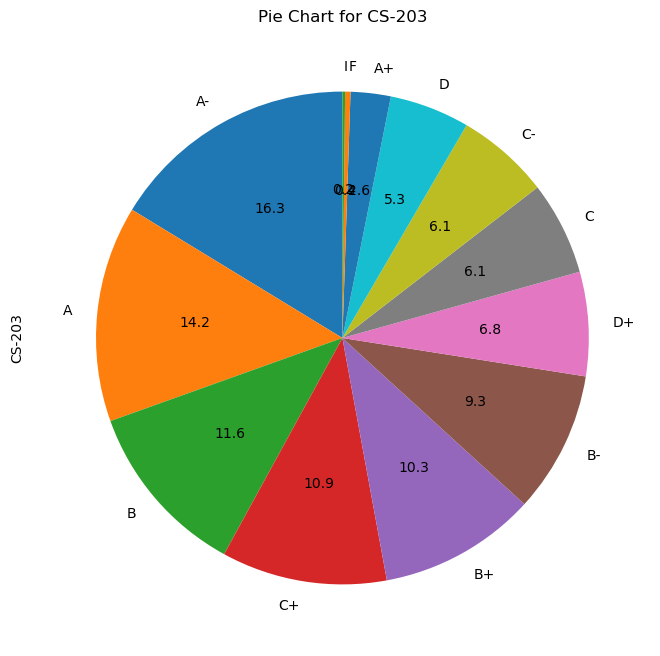

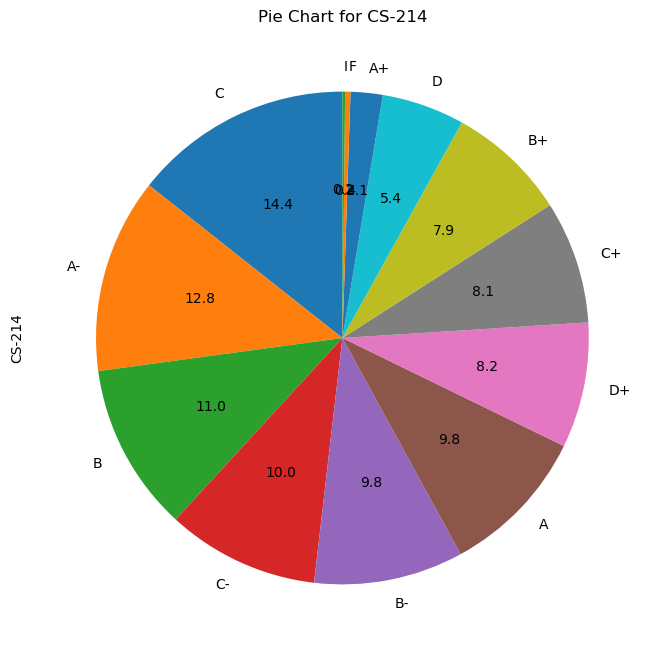

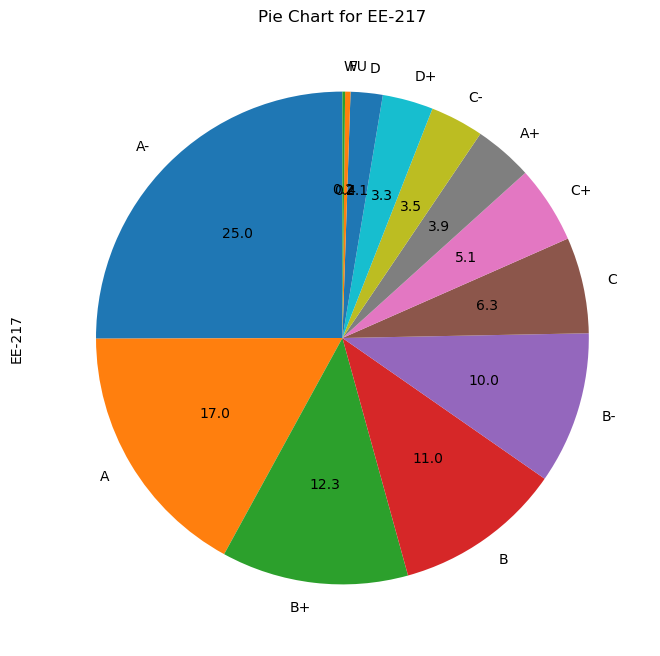

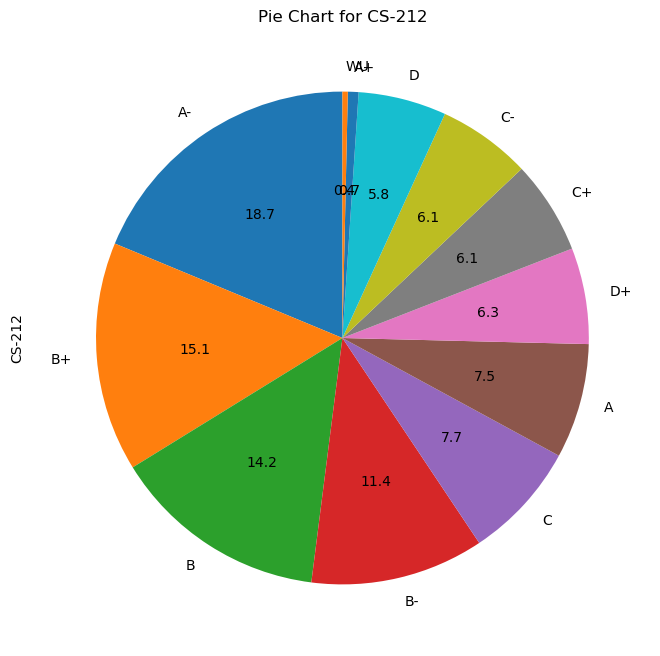

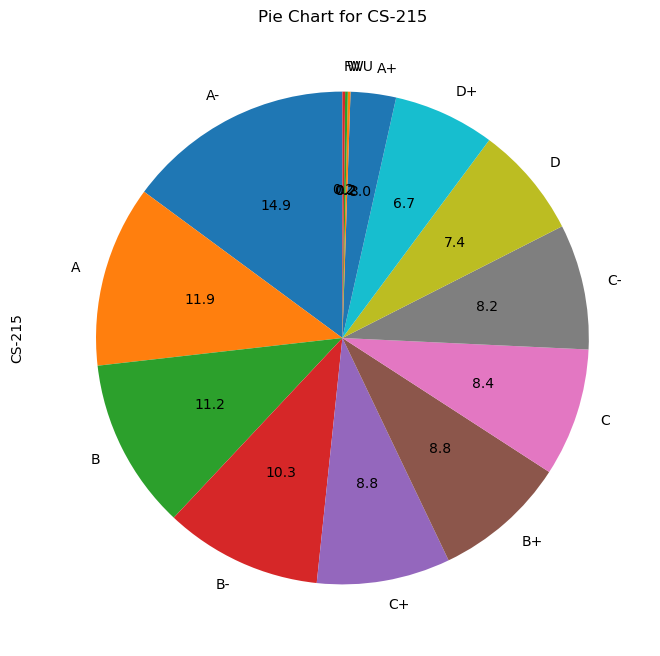

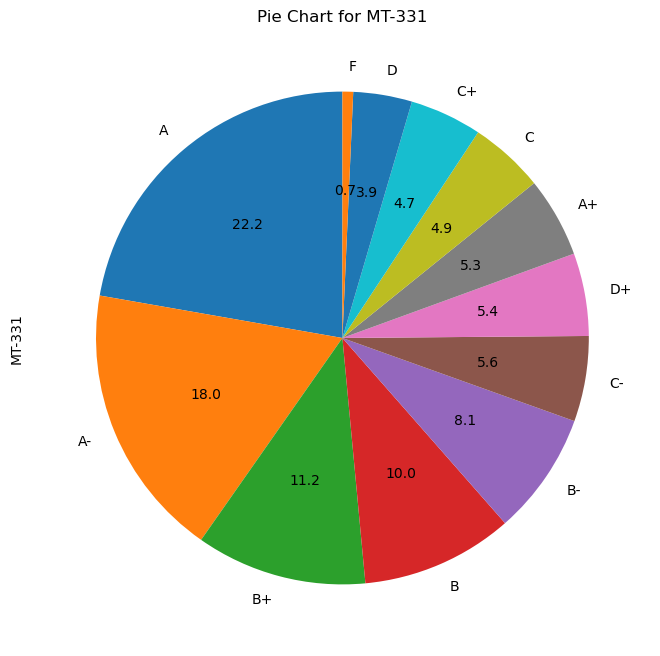

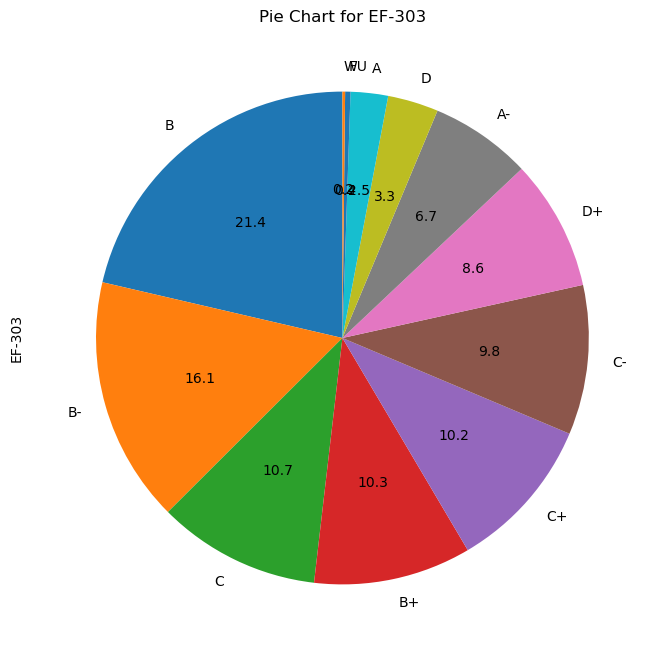

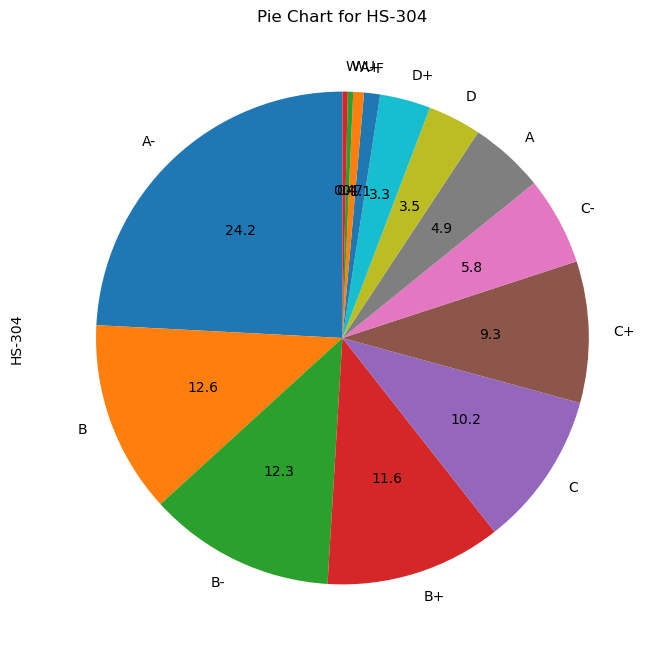

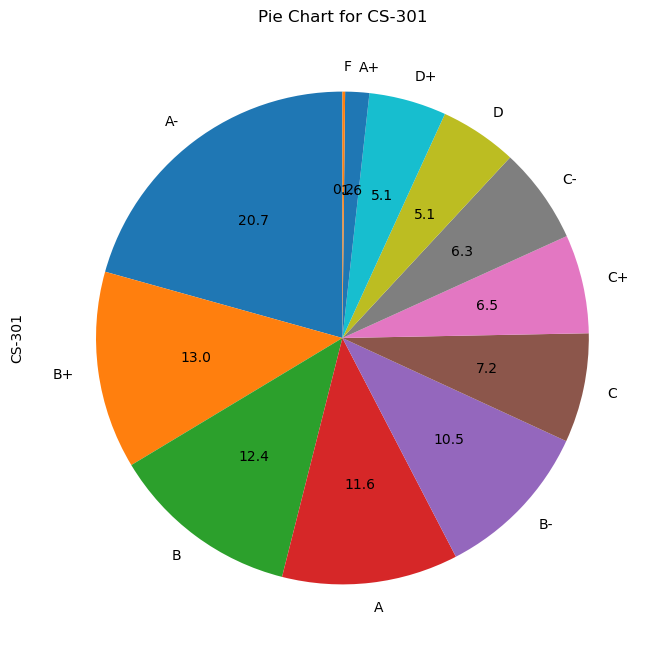

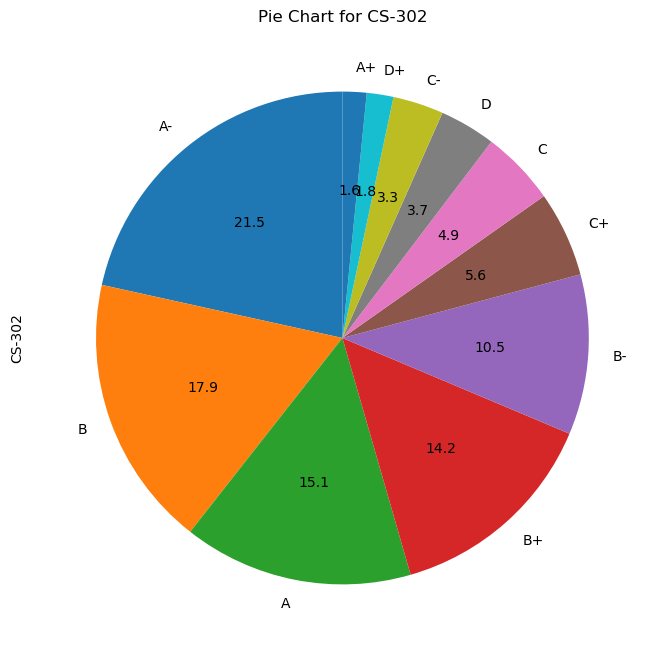

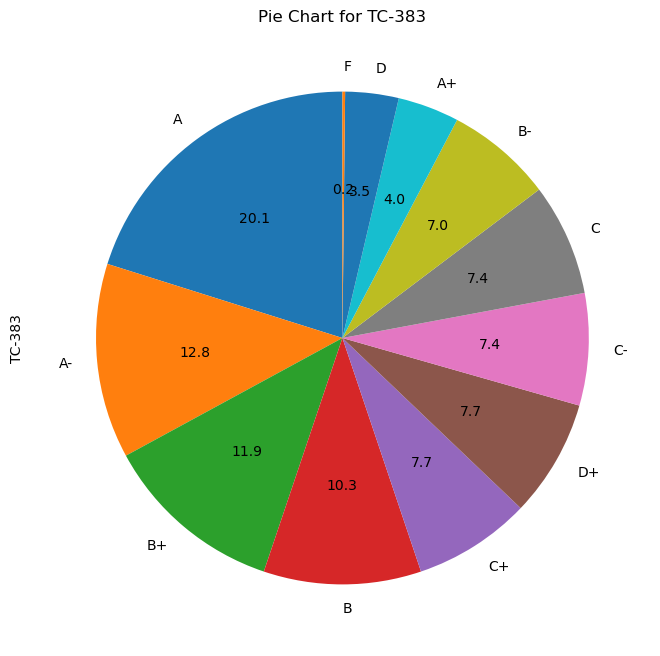

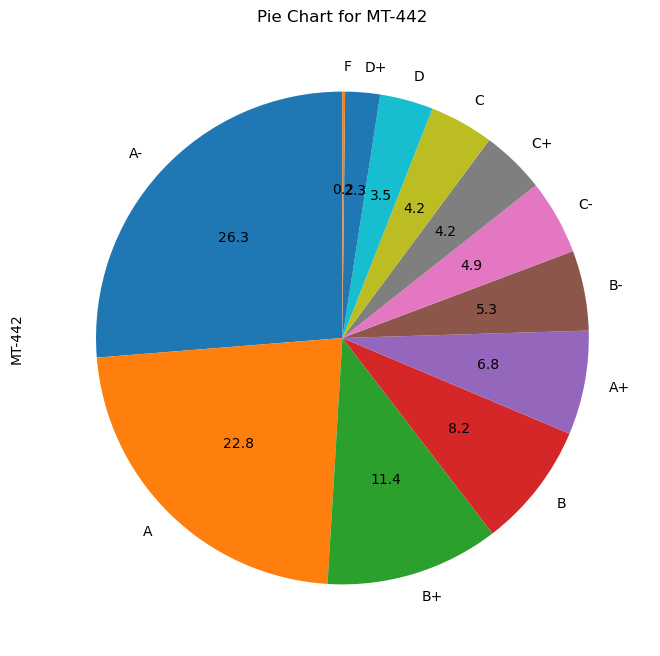

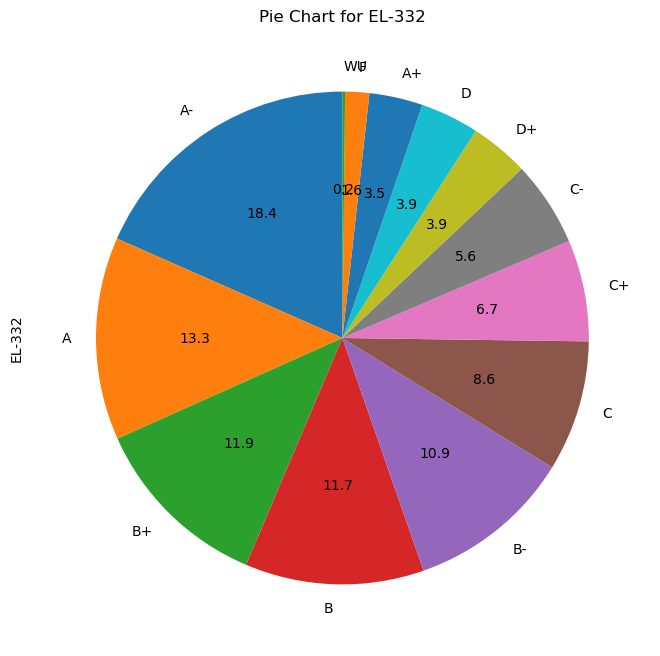

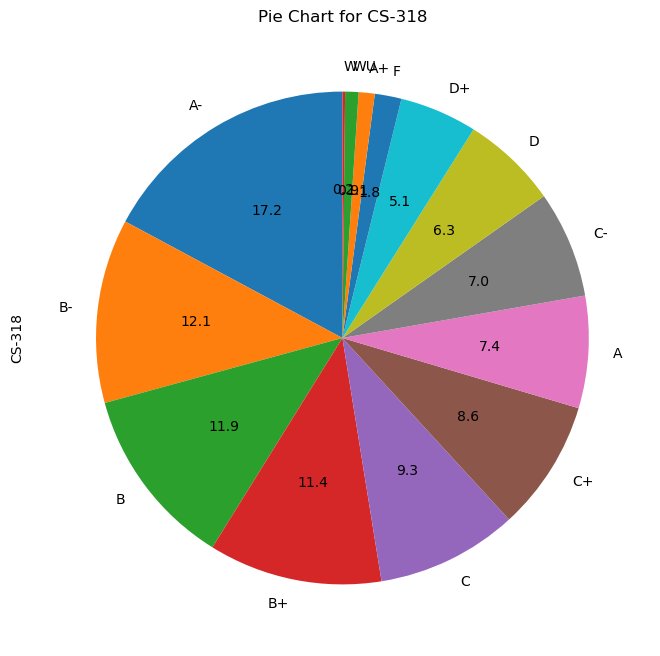

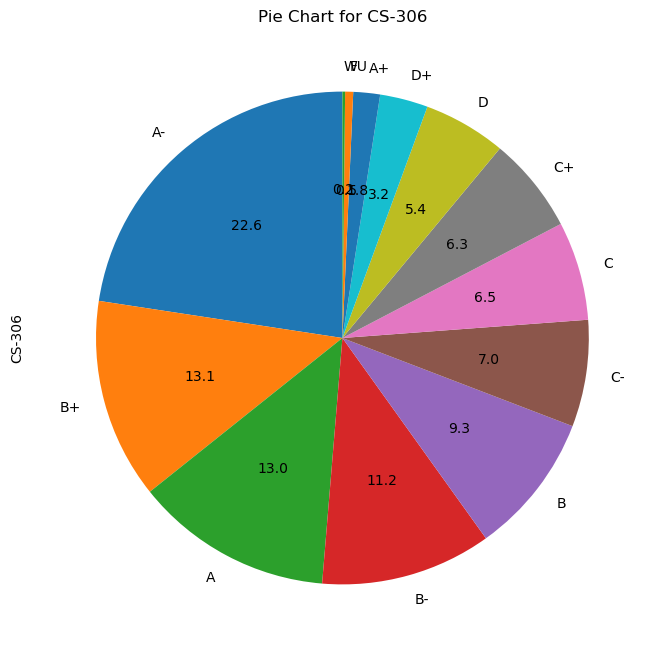

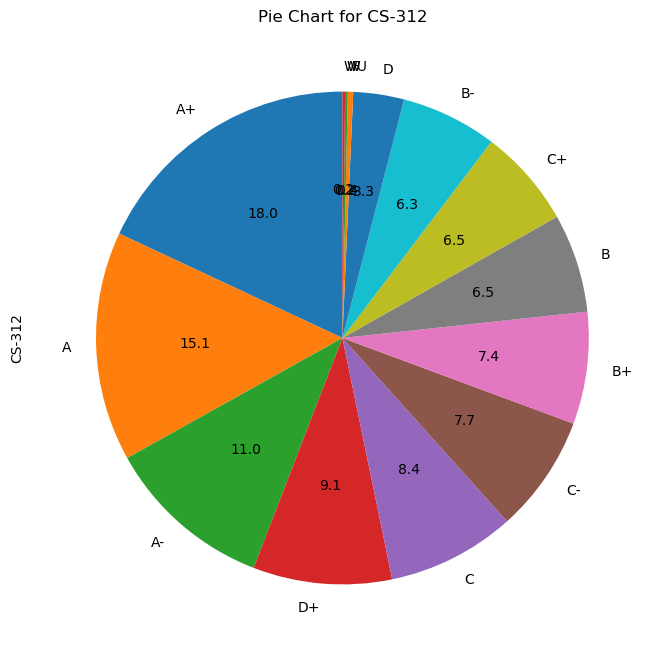

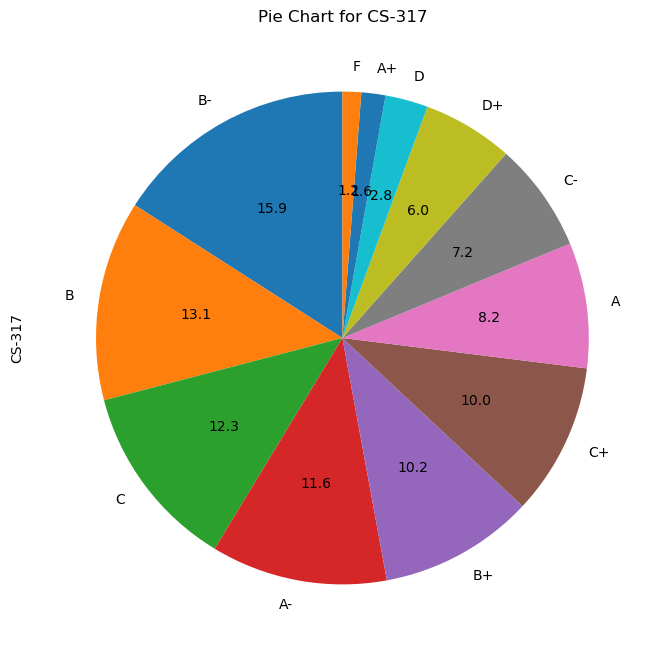

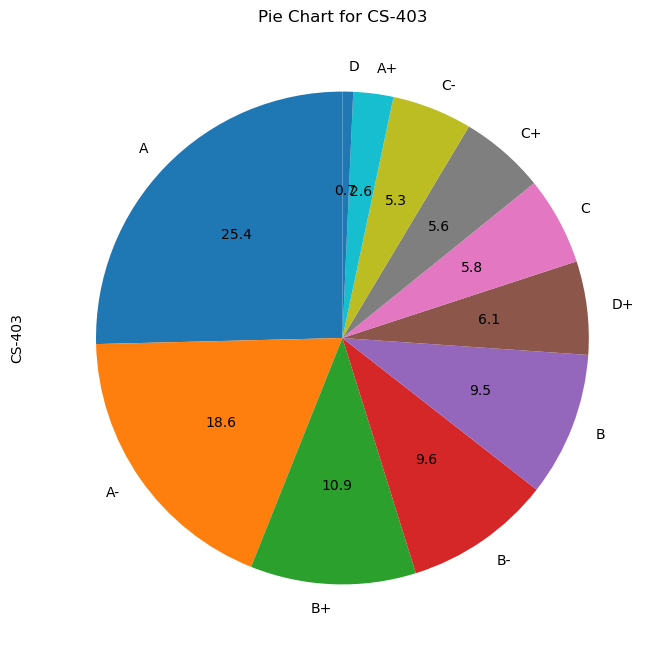

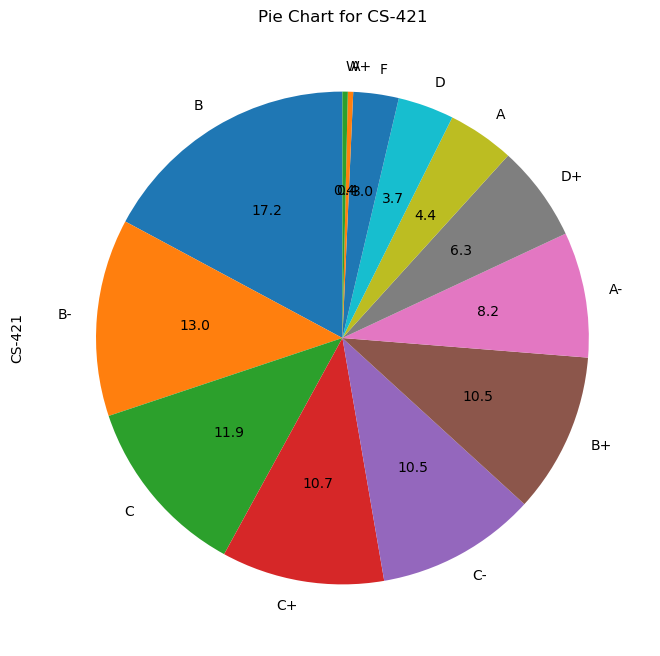

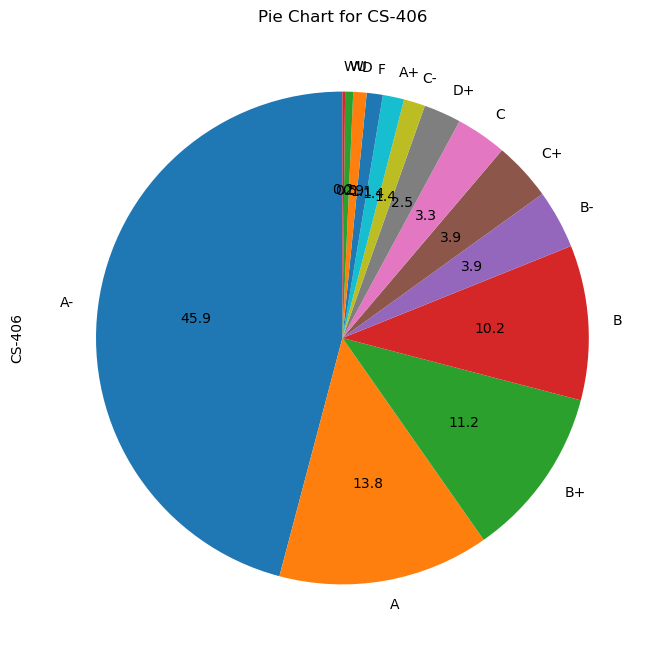

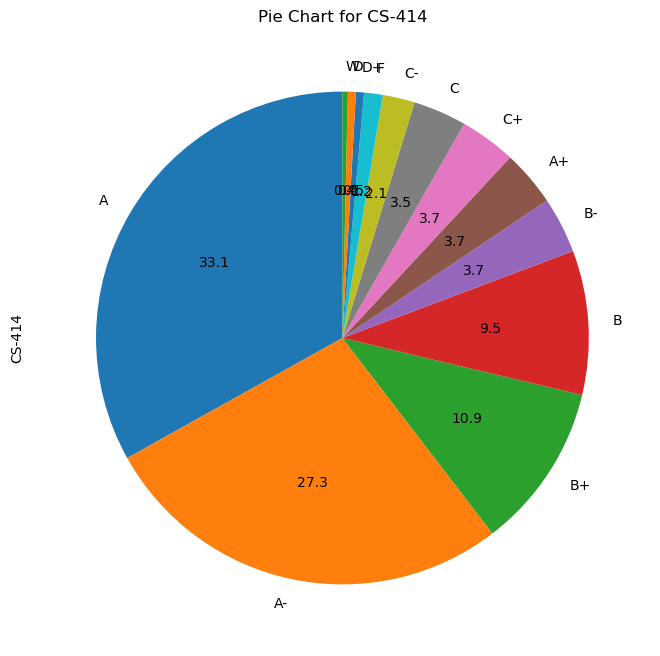

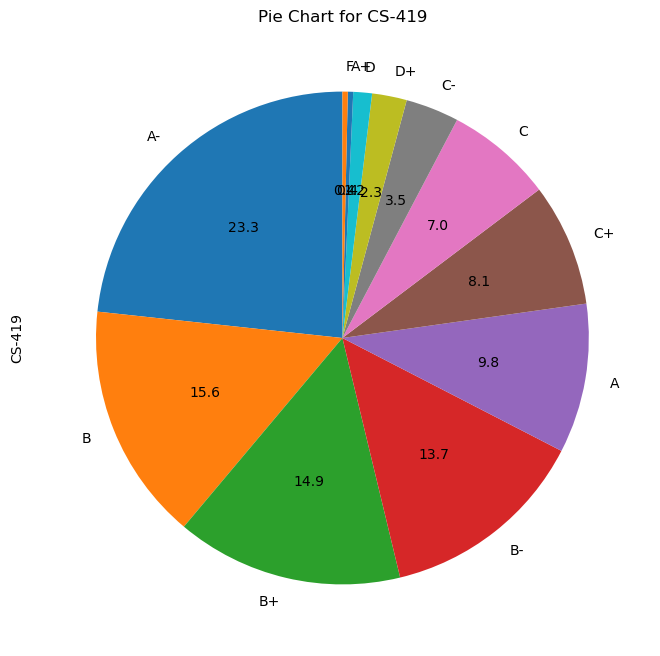

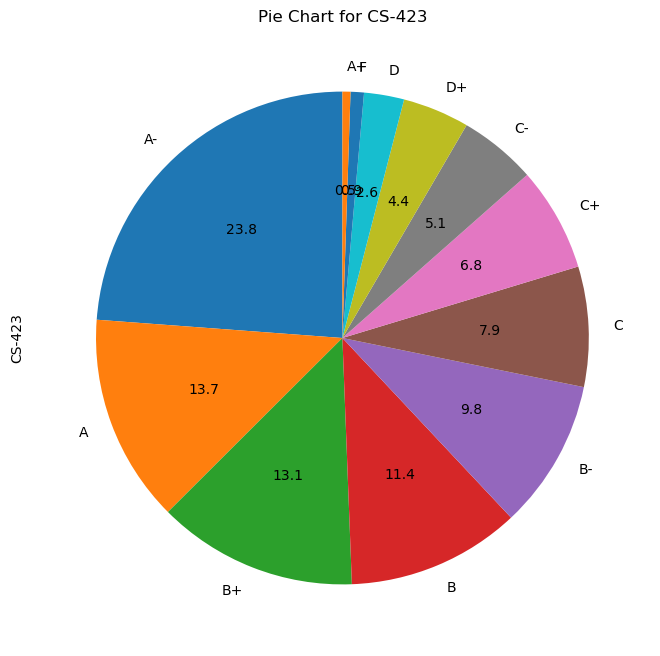

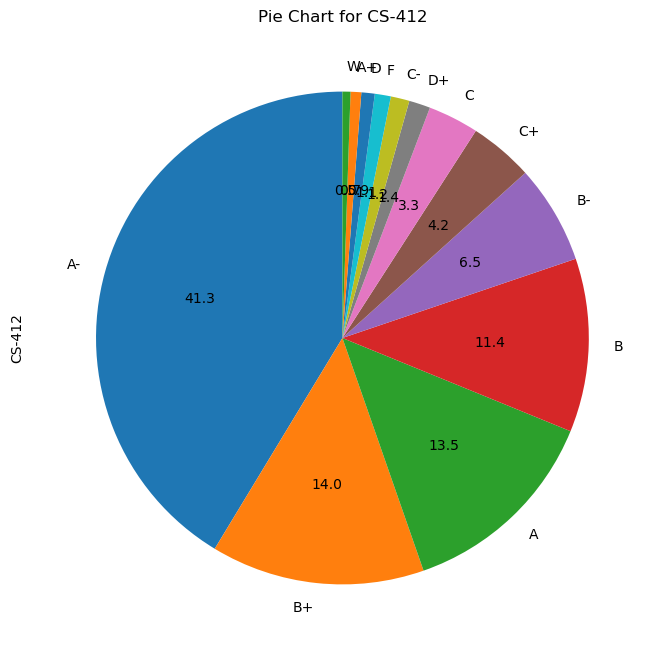

In [26]:
Count = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
         'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
         'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
         'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
         'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
         'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

for column in Count:
    plt.figure(figsize=(8, 8))
    plt.title(f'Pie Chart for {column}')
    df[column].value_counts().plot.pie(autopct='%1.1f', startangle=90)
    plt.show()

In [ ]:
As we observed in count plot and pie plot majority are in A-/A/B/B-.

But in the CS-312 there are majority of get A+ Grade with 18% 
CS-414 have majority of A Grade with 33.1% 
cs-406 have majority of A- Grade with 45.9%


<AxesSubplot:xlabel='CGPA', ylabel='Count'>

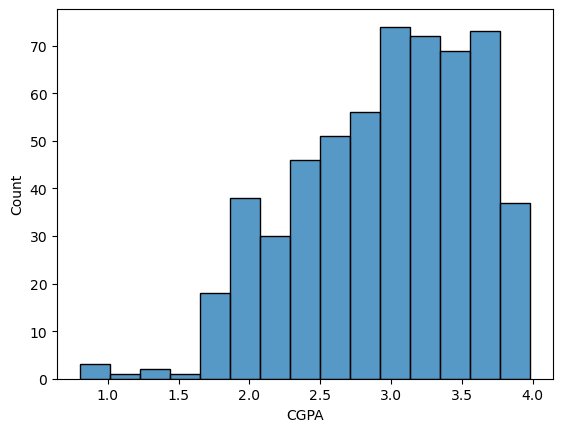

In [27]:
sns.histplot(df['CGPA'])

As we observe in above graph majority are in 2.95 to 3.75 CGPA.

In [28]:
le = LabelEncoder()

# Create a dictionary to store fitted encoders
label_encoders = {}

# Apply label encoding to categorical columns
for column in df.drop(['CGPA'], axis=1):
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [29]:
df

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         5      10       8          6       8      10       9       8   
1         0       9      10          9       5       6       9       0   
2         0       3       0          5       4       0       5       4   
3         9       7      10          9       9       2      10       8   
4         2       2       2          4       0       0       2       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       3       0       0          2       1       0       2       2   
567       1       0       0          0       0       0       0       2   
568       3       0       2          4       0       0       0       0   
569       0       4       9          0       9      10       5       8   
570       6       9       9          6       6      10       3       7   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0         5       8  ...       8       8       8       8       2       0   
1        10       9  ...      10       9       6       9       2       5   
2         2       2  ...       3       3       0       6       0       0   
3         9       7  ...      10       6      10       8       5       3   
4         0       2  ...       5       4       4       5       2       0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       1       4  ...       2       2       0       0       0       4   
567       0       0  ...       4       4       0       0       2       3   
568       0       3  ...       2       3       0       4       0       6   
569       5       8  ...       9       3       3       8       9       6   
570       6      10  ...       7       6       5       9      11       8   

     CS-419  CS-423  CS-412   CGPA  
0         8       3       2  2.205  
1         6       6       3  2.008  
2         0       2       0  3.608  
3         7       7       7  1.906  
4         2       2       0  3.448  
..      ...     ...     ...    ...  
566       4       3       0  3.798  
567       2       6       2  3.772  
568       4       2       2  3.470  
569       3       5       6  2.193  
570       4       9       8  1.753  

[571 rows x 42 columns]

now we observe that all of the columns are converted.

In [30]:
df.dtypes

PH-121         int32
HS-101         int32
CY-105         int32
HS-105/12      int32
MT-111         int32
CS-105         int32
CS-106         int32
EL-102         int32
EE-119         int32
ME-107         int32
CS-107         int32
HS-205/20      int32
MT-222         int32
EE-222         int32
MT-224         int32
CS-210         int32
CS-211         int32
CS-203         int32
CS-214         int32
EE-217         int32
CS-212         int32
CS-215         int32
MT-331         int32
EF-303         int32
HS-304         int32
CS-301         int32
CS-302         int32
TC-383         int32
MT-442         int32
EL-332         int32
CS-318         int32
CS-306         int32
CS-312         int32
CS-317         int32
CS-403         int32
CS-421         int32
CS-406         int32
CS-414         int32
CS-419         int32
CS-423         int32
CS-412         int32
CGPA         float64
dtype: object

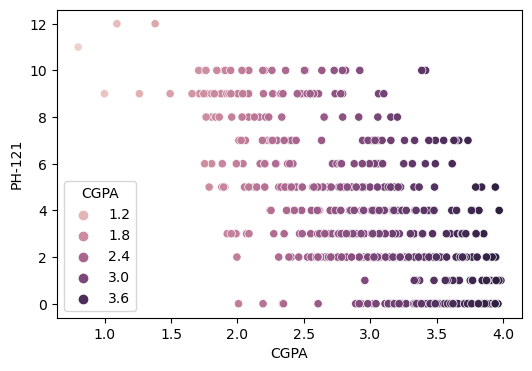

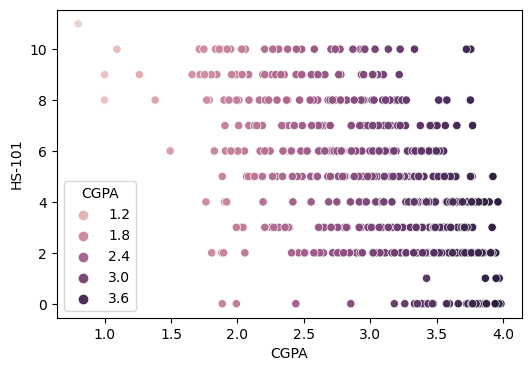

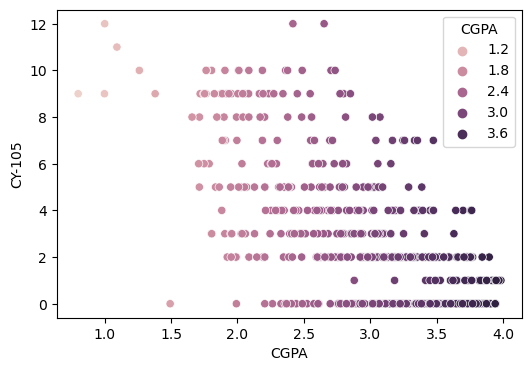

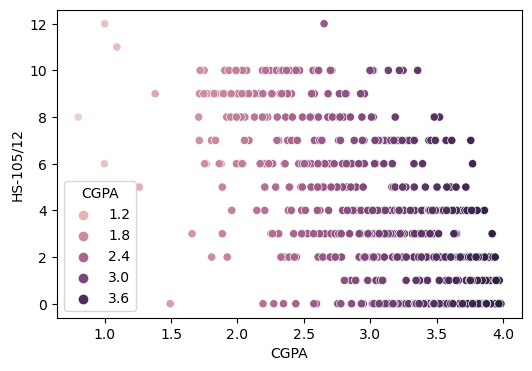

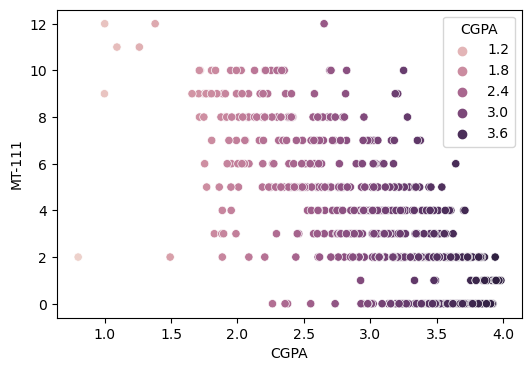

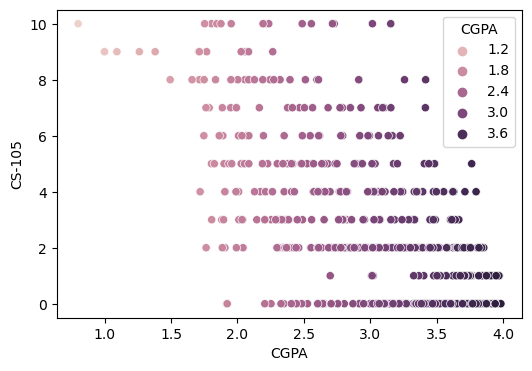

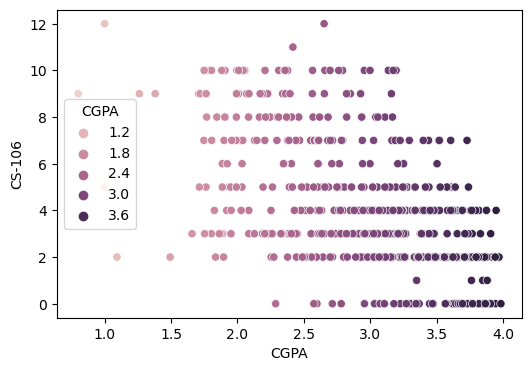

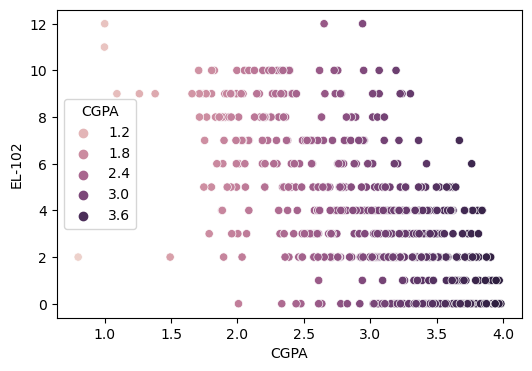

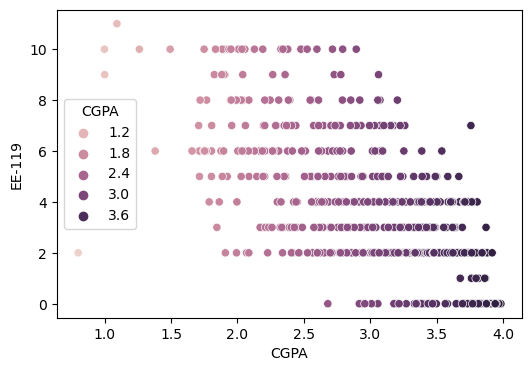

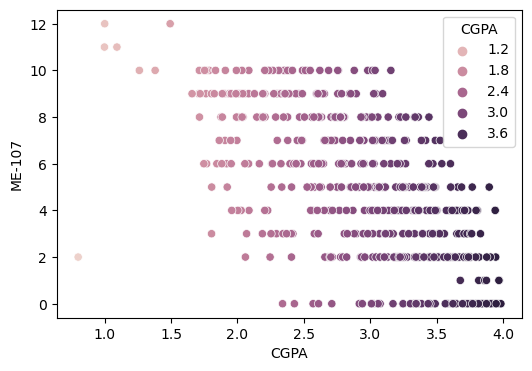

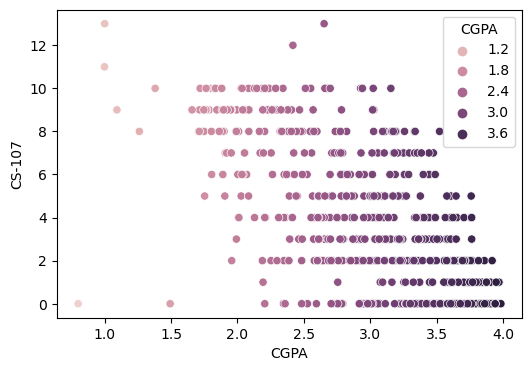

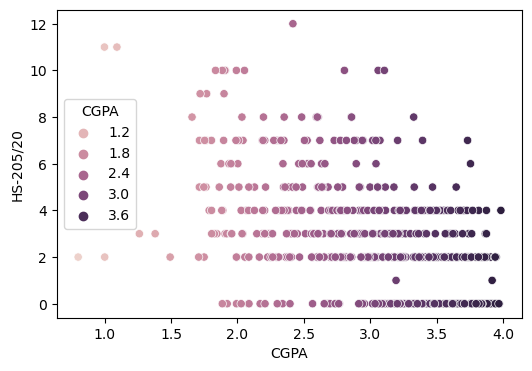

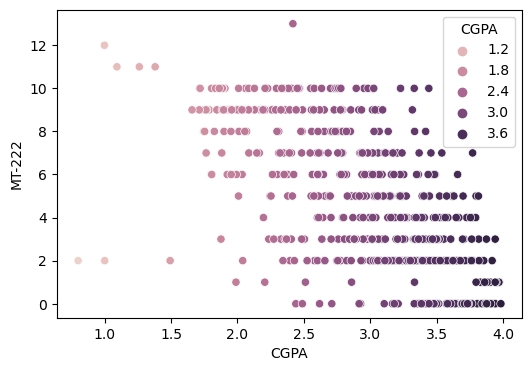

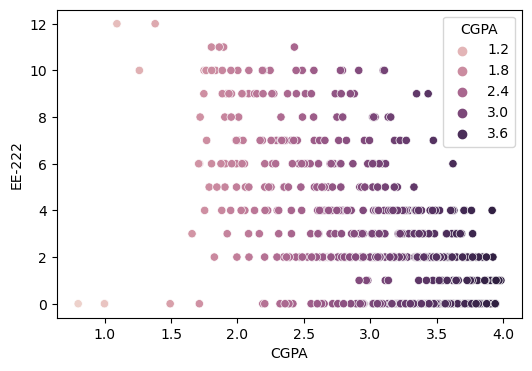

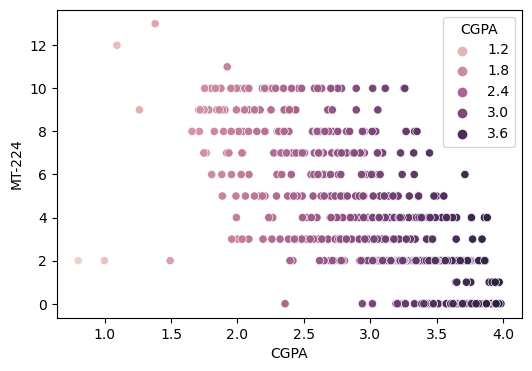

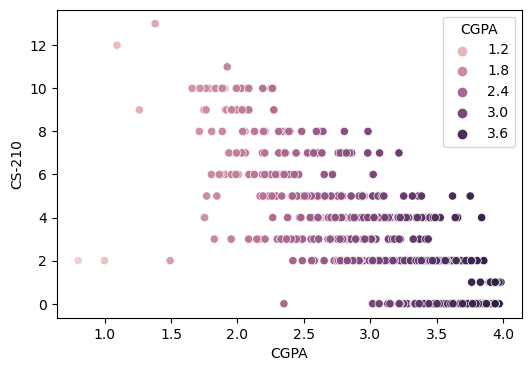

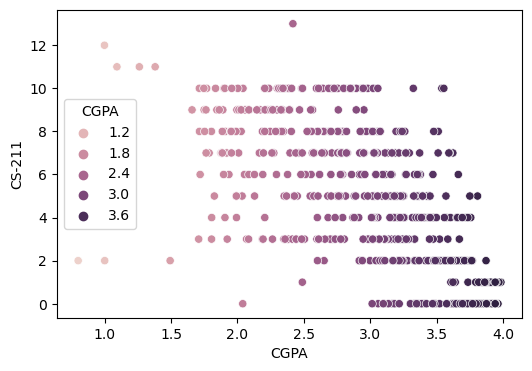

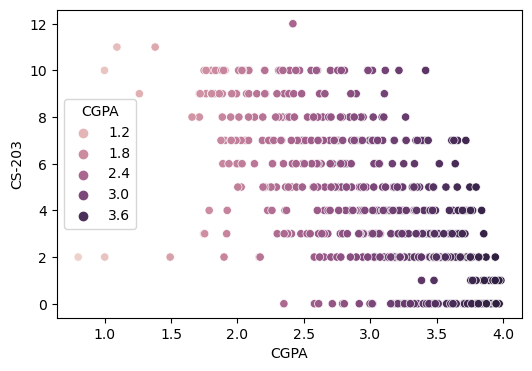

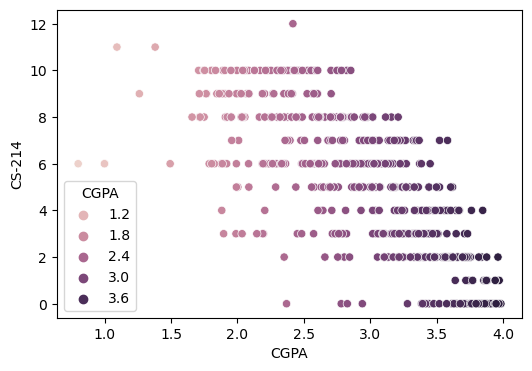

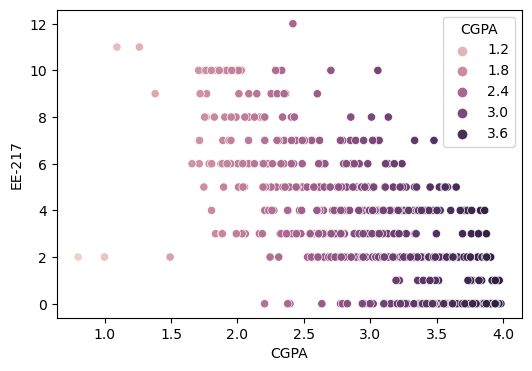

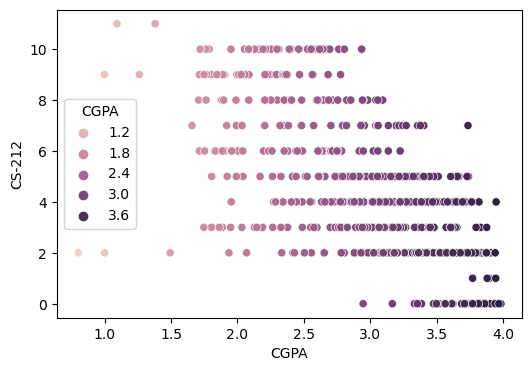

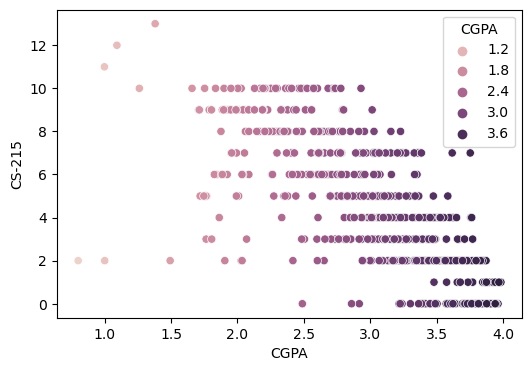

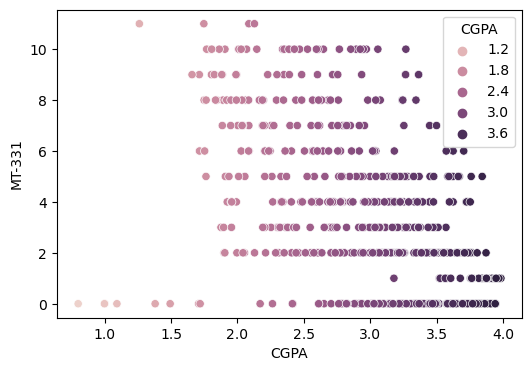

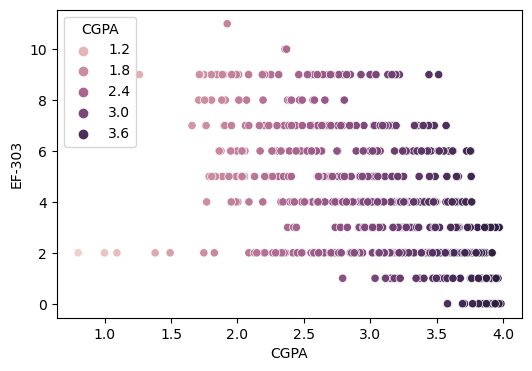

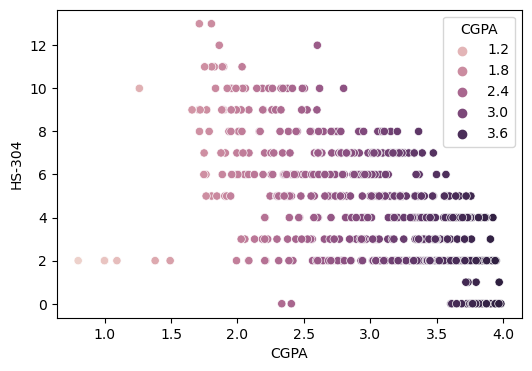

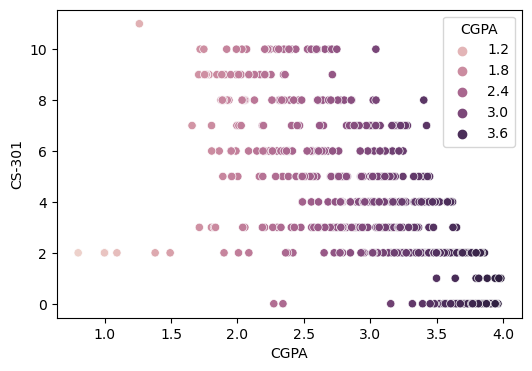

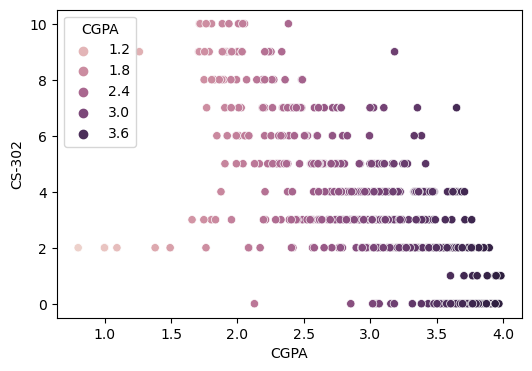

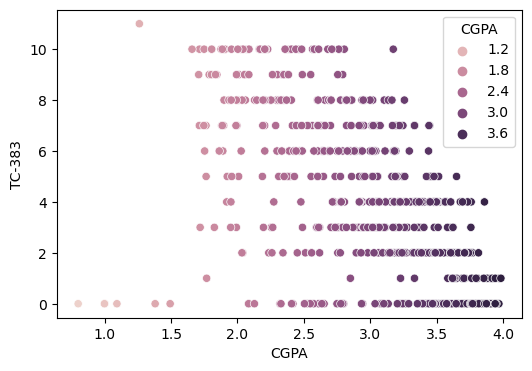

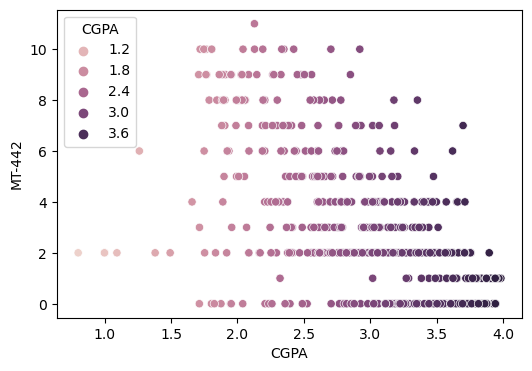

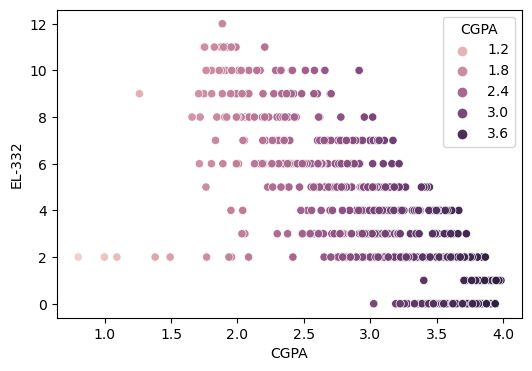

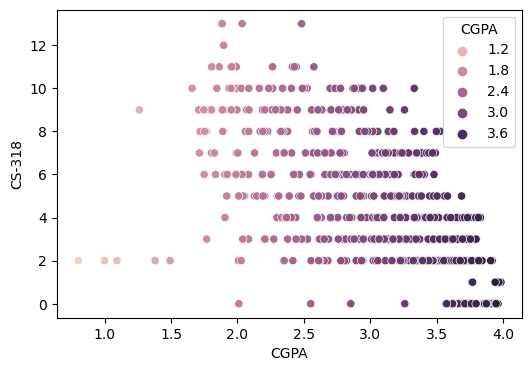

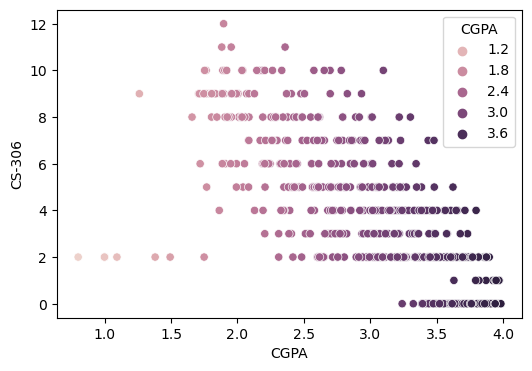

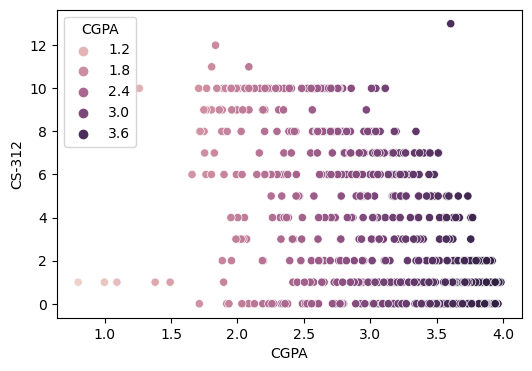

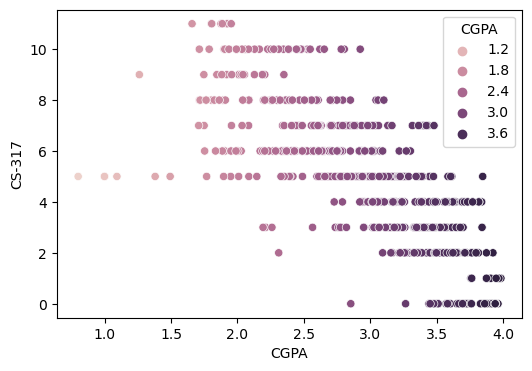

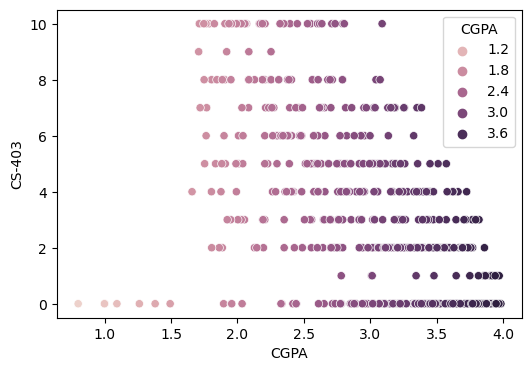

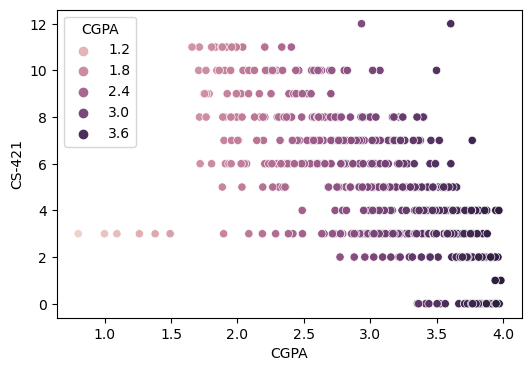

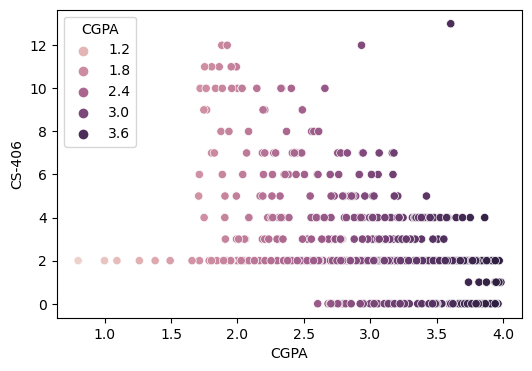

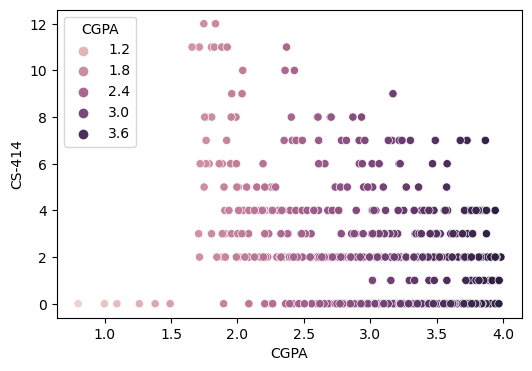

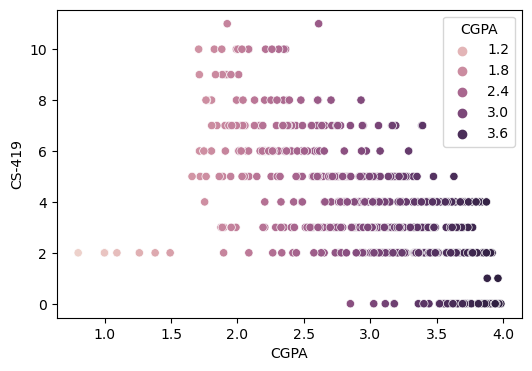

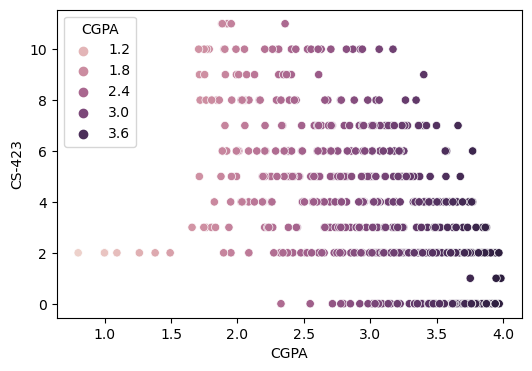

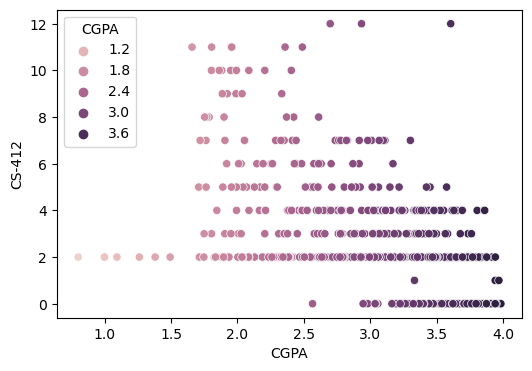

In [32]:
# plot graph for co-relation in Bi Variate Analysis
for columns in df.drop(['CGPA'],axis=1):
    plt.figure(figsize=(6,4))
    sns.scatterplot(df['CGPA'],df[columns],hue=df['CGPA'])
    plt.show()

As we observe in this graphs we can observe that majority are getting high CGPA with getting high grade.

<Figure size 600x400 with 0 Axes>

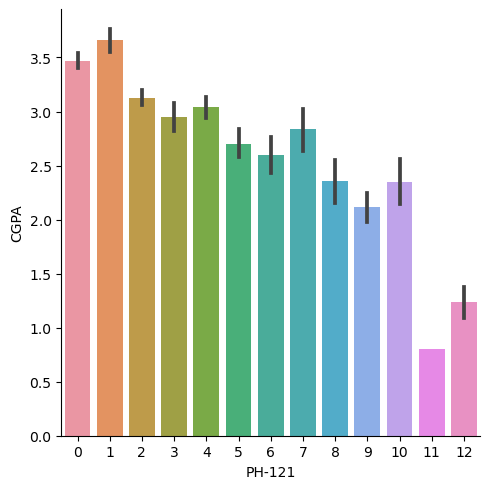

<Figure size 600x400 with 0 Axes>

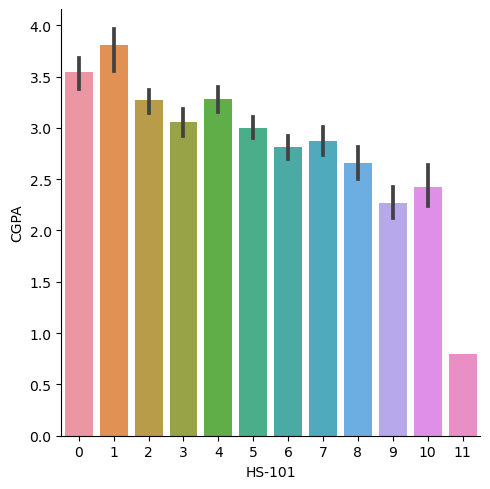

<Figure size 600x400 with 0 Axes>

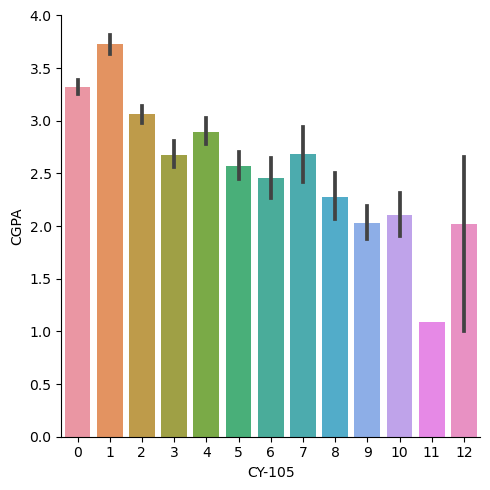

<Figure size 600x400 with 0 Axes>

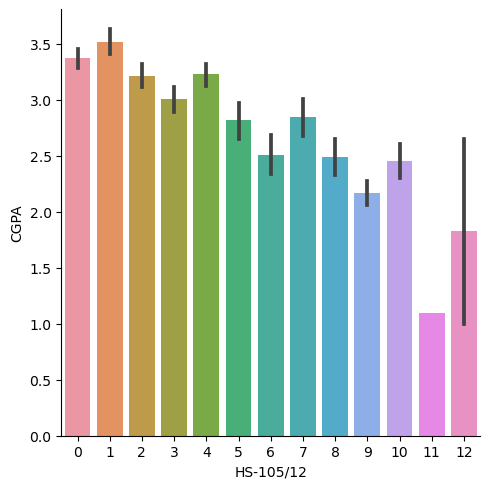

<Figure size 600x400 with 0 Axes>

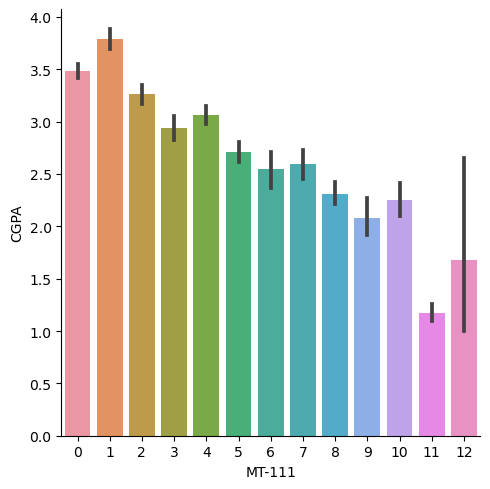

<Figure size 600x400 with 0 Axes>

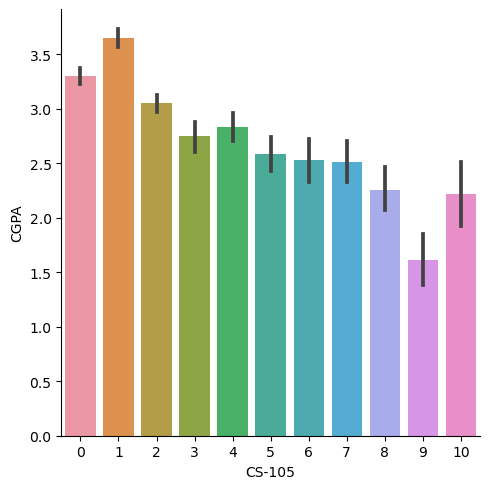

<Figure size 600x400 with 0 Axes>

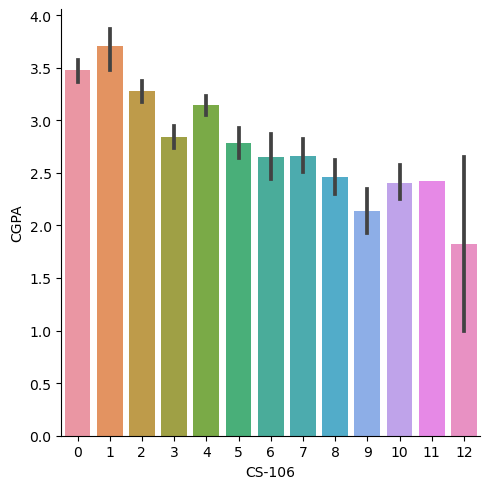

<Figure size 600x400 with 0 Axes>

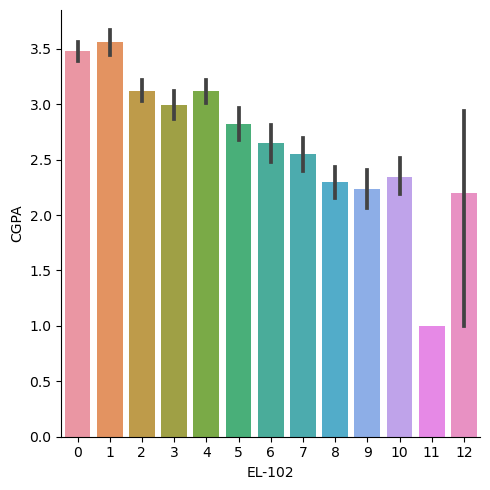

<Figure size 600x400 with 0 Axes>

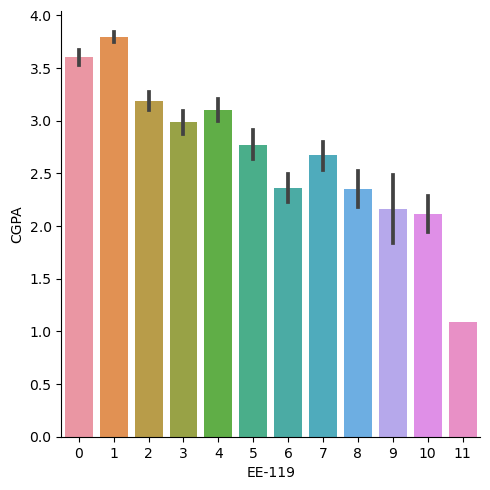

<Figure size 600x400 with 0 Axes>

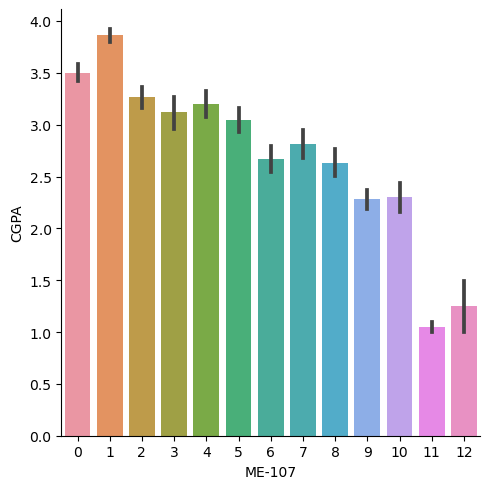

<Figure size 600x400 with 0 Axes>

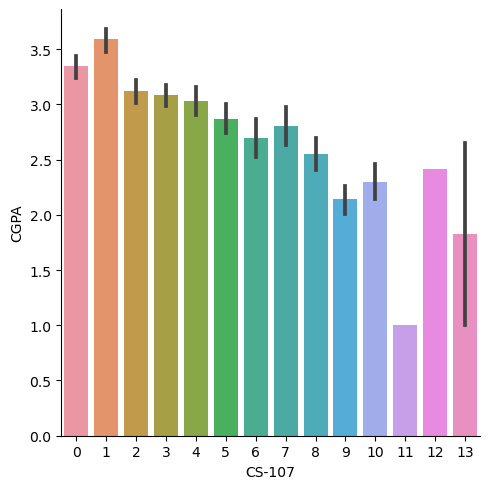

<Figure size 600x400 with 0 Axes>

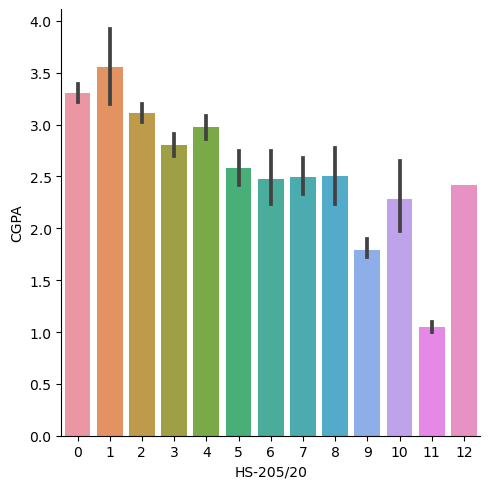

<Figure size 600x400 with 0 Axes>

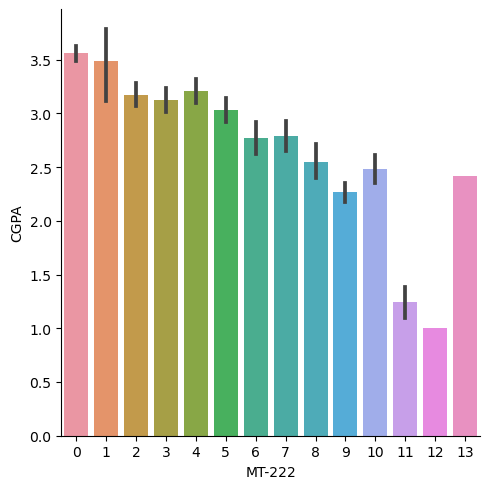

<Figure size 600x400 with 0 Axes>

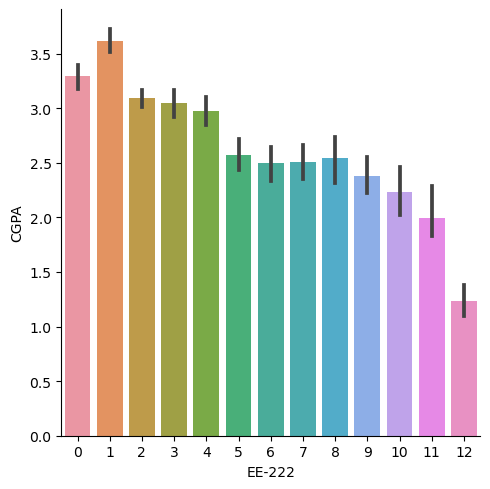

<Figure size 600x400 with 0 Axes>

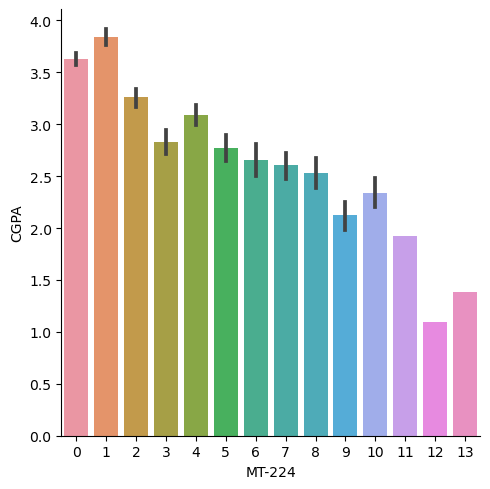

<Figure size 600x400 with 0 Axes>

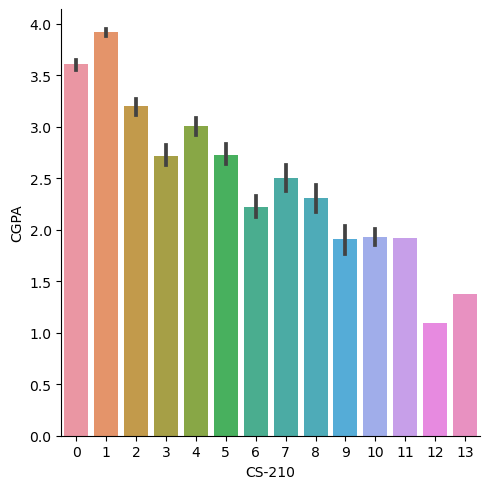

<Figure size 600x400 with 0 Axes>

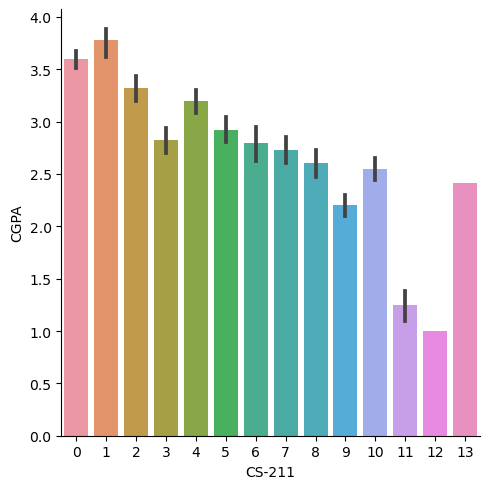

<Figure size 600x400 with 0 Axes>

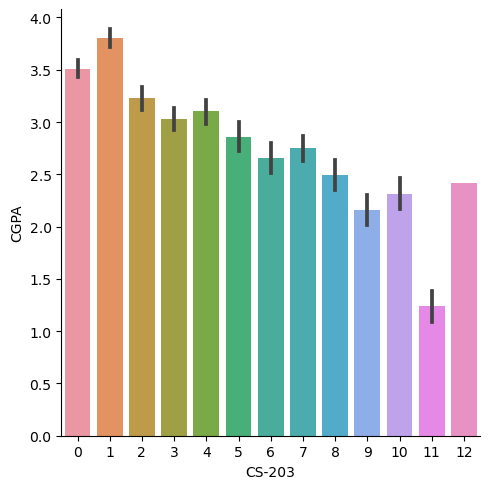

<Figure size 600x400 with 0 Axes>

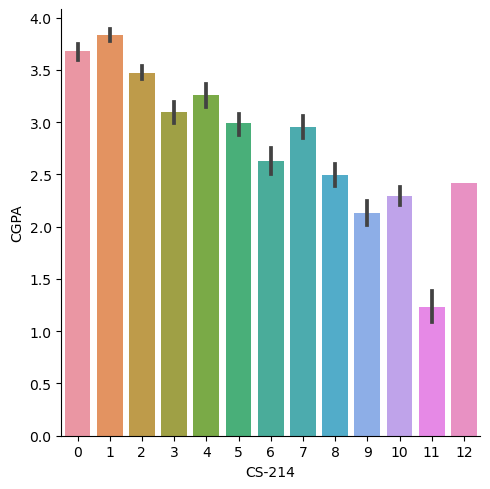

<Figure size 600x400 with 0 Axes>

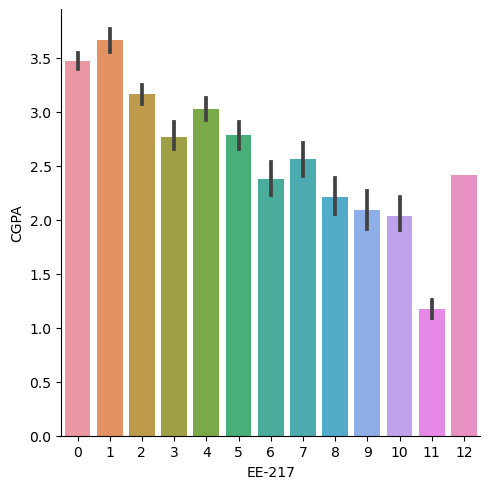

<Figure size 600x400 with 0 Axes>

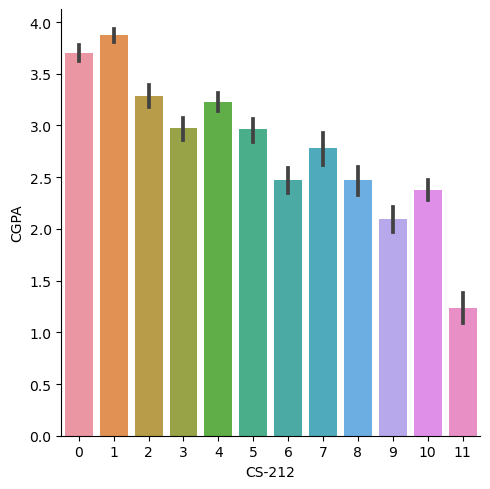

<Figure size 600x400 with 0 Axes>

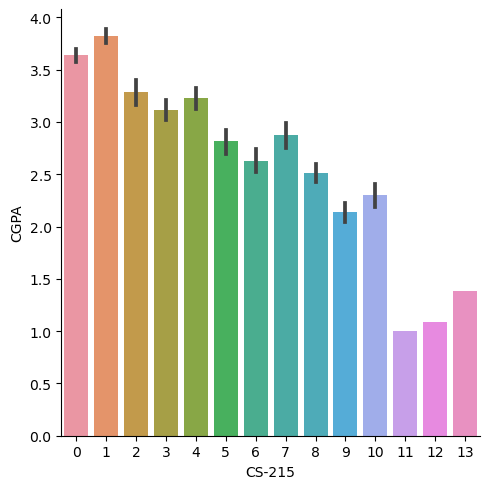

<Figure size 600x400 with 0 Axes>

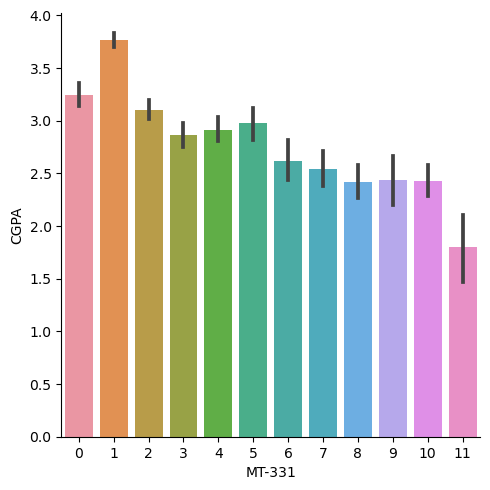

<Figure size 600x400 with 0 Axes>

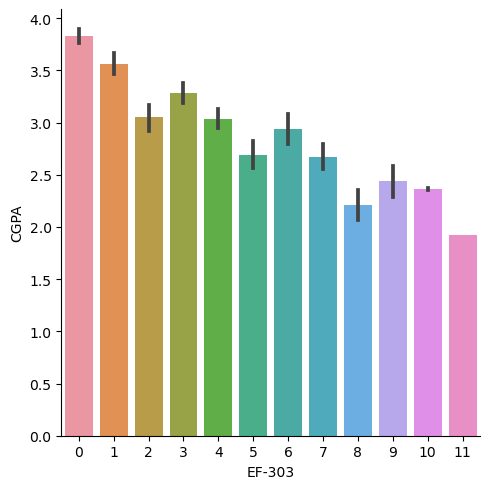

<Figure size 600x400 with 0 Axes>

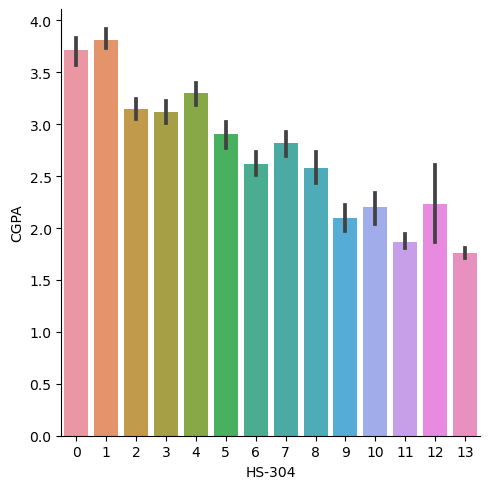

<Figure size 600x400 with 0 Axes>

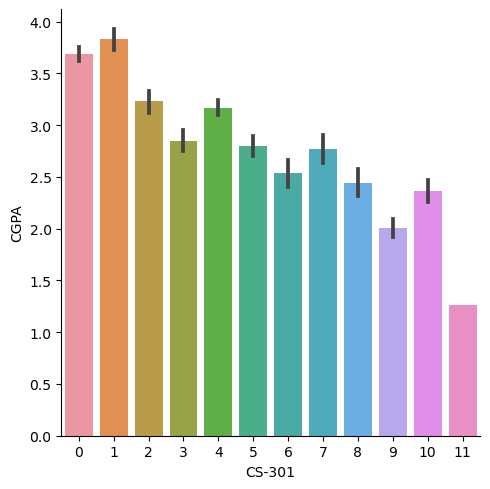

<Figure size 600x400 with 0 Axes>

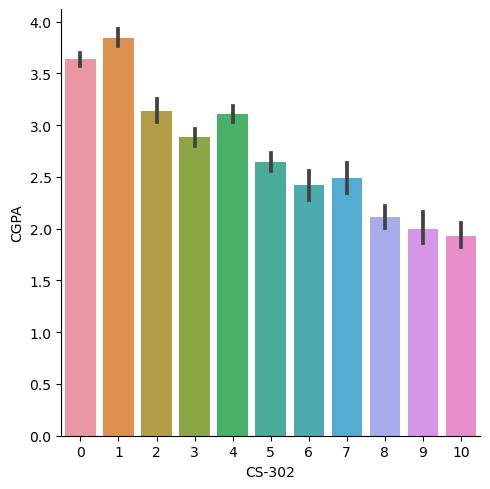

<Figure size 600x400 with 0 Axes>

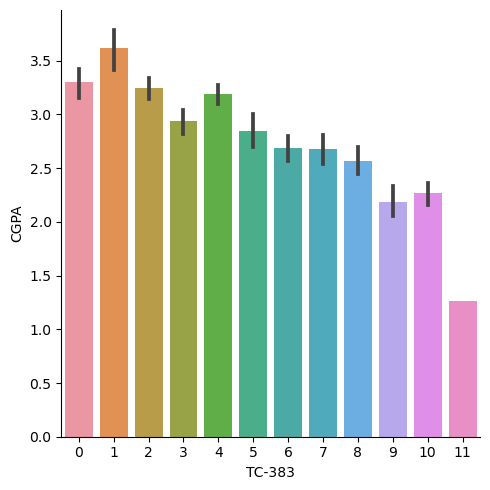

<Figure size 600x400 with 0 Axes>

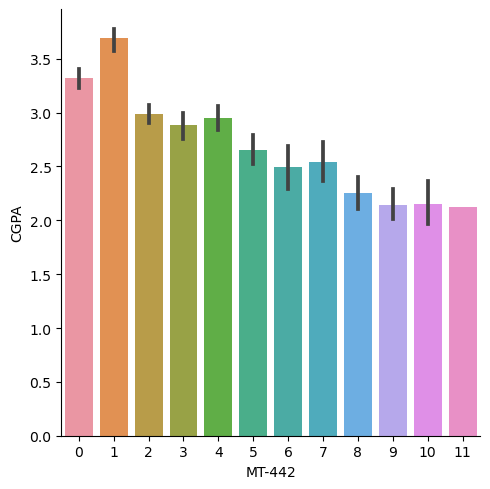

<Figure size 600x400 with 0 Axes>

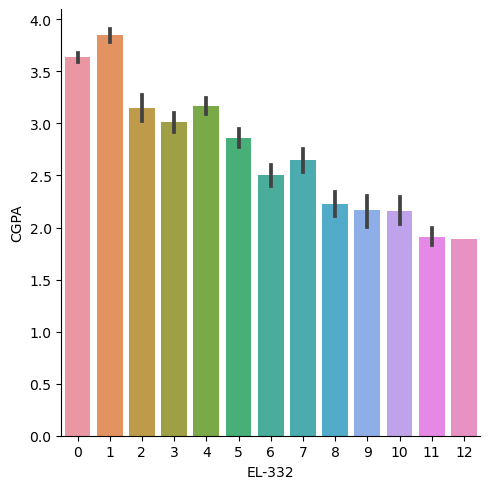

<Figure size 600x400 with 0 Axes>

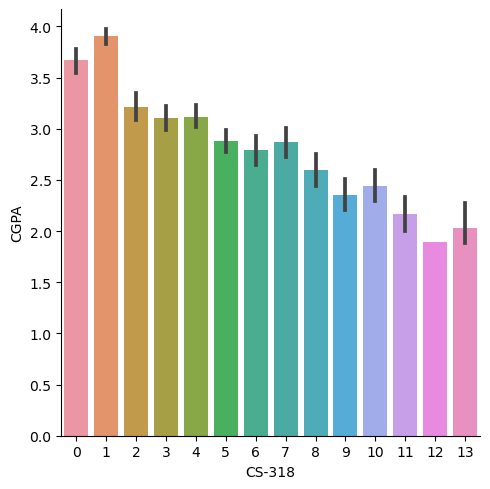

<Figure size 600x400 with 0 Axes>

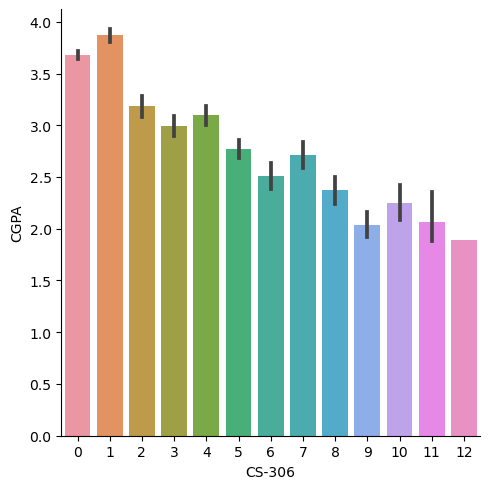

<Figure size 600x400 with 0 Axes>

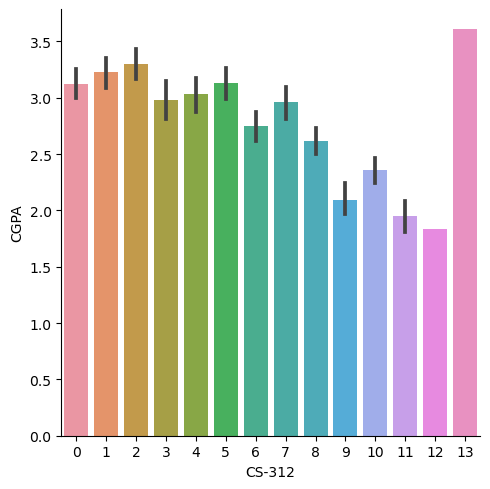

<Figure size 600x400 with 0 Axes>

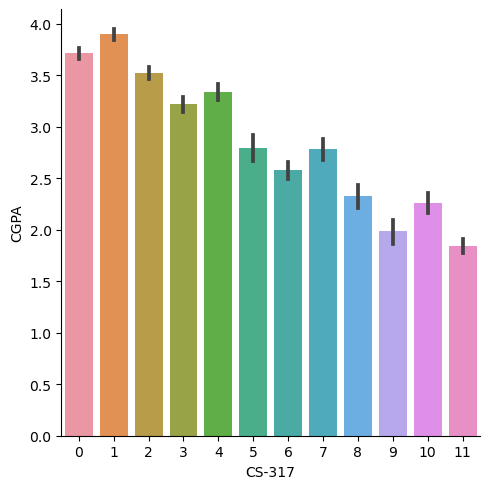

<Figure size 600x400 with 0 Axes>

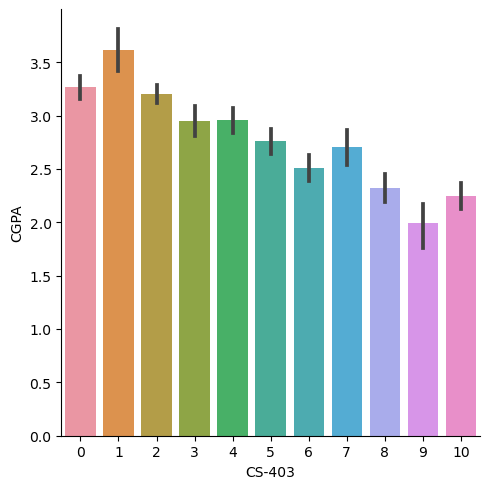

<Figure size 600x400 with 0 Axes>

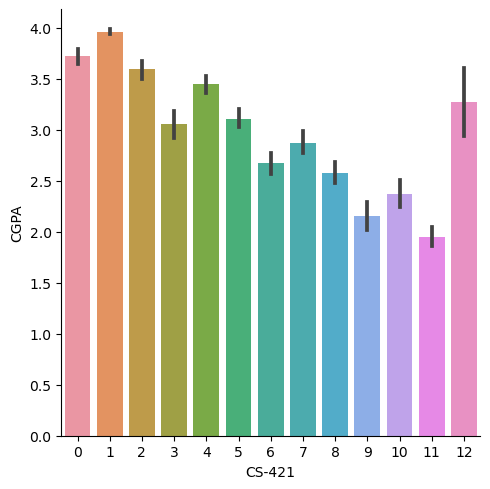

<Figure size 600x400 with 0 Axes>

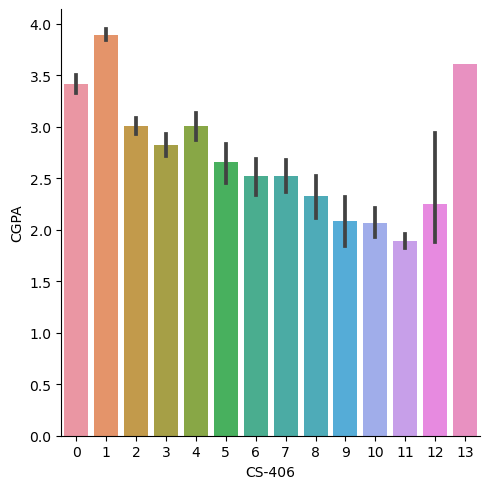

<Figure size 600x400 with 0 Axes>

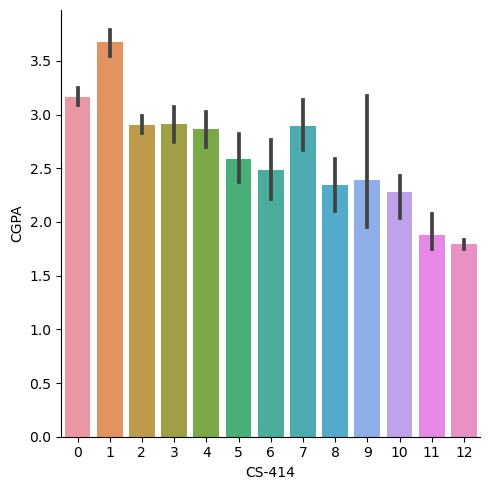

<Figure size 600x400 with 0 Axes>

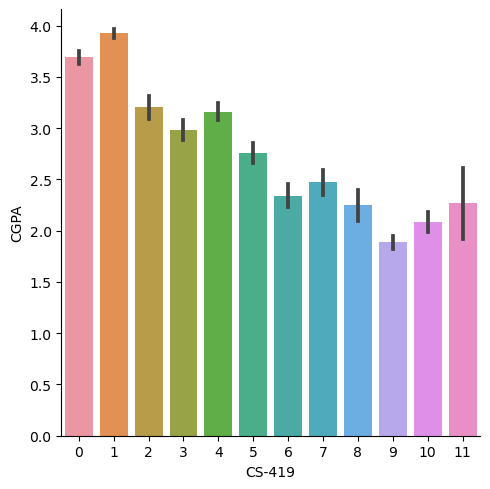

<Figure size 600x400 with 0 Axes>

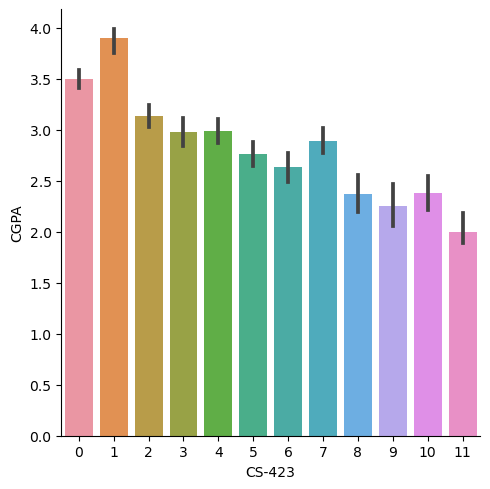

<Figure size 600x400 with 0 Axes>

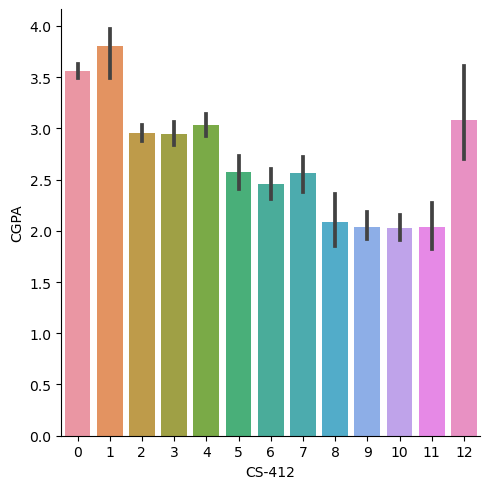

In [35]:
# plot graph for co-relation in Bi Variate Analysis
for col in df.drop(['CGPA'],axis=1):
    plt.figure(figsize=(6,4))
    sns.catplot(x=col,y='CGPA',data=df,kind='bar')
    plt.show()

As we observe in each columns for getting high CGPA you have to get grade 0 and 1 if you are get 0 and 1 grade in all subject means your CGPA is high by getting 1 grade in all subject you CGPA is very fabulous.

Rest of are avarage Grade and Avarage CGPA.

# Multivariate analysis

In [36]:
df.corr()

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.382436  0.557843   0.498561  0.468968  0.609990   
HS-101     0.382436  1.000000  0.335074   0.473132  0.432742  0.400713   
CY-105     0.557843  0.335074  1.000000   0.510123  0.538380  0.578573   
HS-105/12  0.498561  0.473132  0.510123   1.000000  0.494731  0.482406   
MT-111     0.468968  0.432742  0.538380   0.494731  1.000000  0.393684   
CS-105     0.609990  0.400713  0.578573   0.482406  0.393684  1.000000   
CS-106     0.293963  0.312019  0.378223   0.499093  0.500729  0.286324   
EL-102     0.423942  0.349412  0.447539   0.360304  0.555895  0.353949   
EE-119     0.579964  0.309697  0.467250   0.400303  0.409161  0.507357   
ME-107     0.533558  0.336545  0.464418   0.320137  0.471685  0.455470   
CS-107     0.477761  0.495906  0.481277   0.540405  0.488977  0.503239   
HS-205/20  0.296428  0.178344  0.261281   0.179766  0.328574  0.192982   
MT-222     0.551805  0.391699  0.485371   0.459571  0.499415  0.477302   
EE-222     0.529273  0.381091  0.394398   0.379369  0.393494  0.487650   
MT-224     0.348024  0.265585  0.437339   0.392068  0.567848  0.259561   
CS-210     0.513314  0.322239  0.489937   0.462070  0.571972  0.440588   
CS-211     0.329882  0.335788  0.453911   0.352640  0.556099  0.342449   
CS-203     0.462853  0.263205  0.400036   0.295711  0.512505  0.410614   
CS-214     0.421076  0.461156  0.463044   0.413251  0.587102  0.414244   
EE-217     0.423468  0.328305  0.398219   0.357855  0.514243  0.339227   
CS-212     0.351823  0.340568  0.420848   0.455820  0.565169  0.321335   
CS-215     0.486069  0.401812  0.512438   0.453450  0.577513  0.456677   
MT-331     0.183034  0.173494  0.366648   0.259306  0.431197  0.231626   
EF-303     0.196272  0.240540  0.334633   0.384338  0.410918  0.196685   
HS-304     0.420629  0.418026  0.323331   0.345015  0.315129  0.456401   
CS-301     0.300945  0.313397  0.368489   0.415815  0.538492  0.230551   
CS-302     0.448213  0.345292  0.460447   0.419373  0.507059  0.426776   
TC-383     0.189226  0.320385  0.300547   0.397499  0.493420  0.214507   
MT-442     0.443980  0.226441  0.430456   0.320701  0.404591  0.407767   
EL-332     0.419078  0.378717  0.353731   0.354519  0.567875  0.360826   
CS-318     0.441321  0.404702  0.322503   0.373775  0.370270  0.444708   
CS-306     0.472384  0.432533  0.362537   0.484828  0.474400  0.418766   
CS-312     0.038184  0.213380  0.261555   0.263143  0.467946  0.059711   
CS-317     0.464022  0.364250  0.472137   0.478816  0.555098  0.387639   
CS-403     0.321264  0.229546  0.464575   0.451907  0.410540  0.279329   
CS-421     0.290351  0.301934  0.349827   0.415946  0.511463  0.236345   
CS-406     0.280166  0.265551  0.129957   0.168150  0.300391  0.237615   
CS-414     0.152437  0.225977  0.008774   0.142806  0.228637  0.121965   
CS-419     0.462770  0.284668  0.430053   0.465352  0.502473  0.306827   
CS-423     0.094921  0.228103  0.120885   0.235029  0.400679  0.045134   
CS-412     0.293815  0.226039  0.064912   0.153293  0.269792  0.179777   
CGPA      -0.663135 -0.537170 -0.658282  -0.613989 -0.730095 -0.613169   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.293963  0.423942  0.579964  0.533558  ...  0.038184  0.464022   
HS-101     0.312019  0.349412  0.309697  0.336545  ...  0.213380  0.364250   
CY-105     0.378223  0.447539  0.467250  0.464418  ...  0.261555  0.472137   
HS-105/12  0.499093  0.360304  0.400303  0.320137  ...  0.263143  0.478816   
MT-111     0.500729  0.555895  0.409161  0.471685  ...  0.467946  0.555098   
CS-105     0.286324  0.353949  0.507357  0.455470  ...  0.059711  0.387639   
CS-106     1.000000  0.338645  0.269895  0.281233  ...  0.450752  0.416562   
EL-102     0.338645  1.000000  0.448908  0.461690  ...  0.301324  0.466556   
EE-119     0.269895  0.448908  1.000000  0.572964  ...  0.156809  0.445496   
ME-107     0.281233  0.461690  0.572964  1.000000 

<AxesSubplot:>

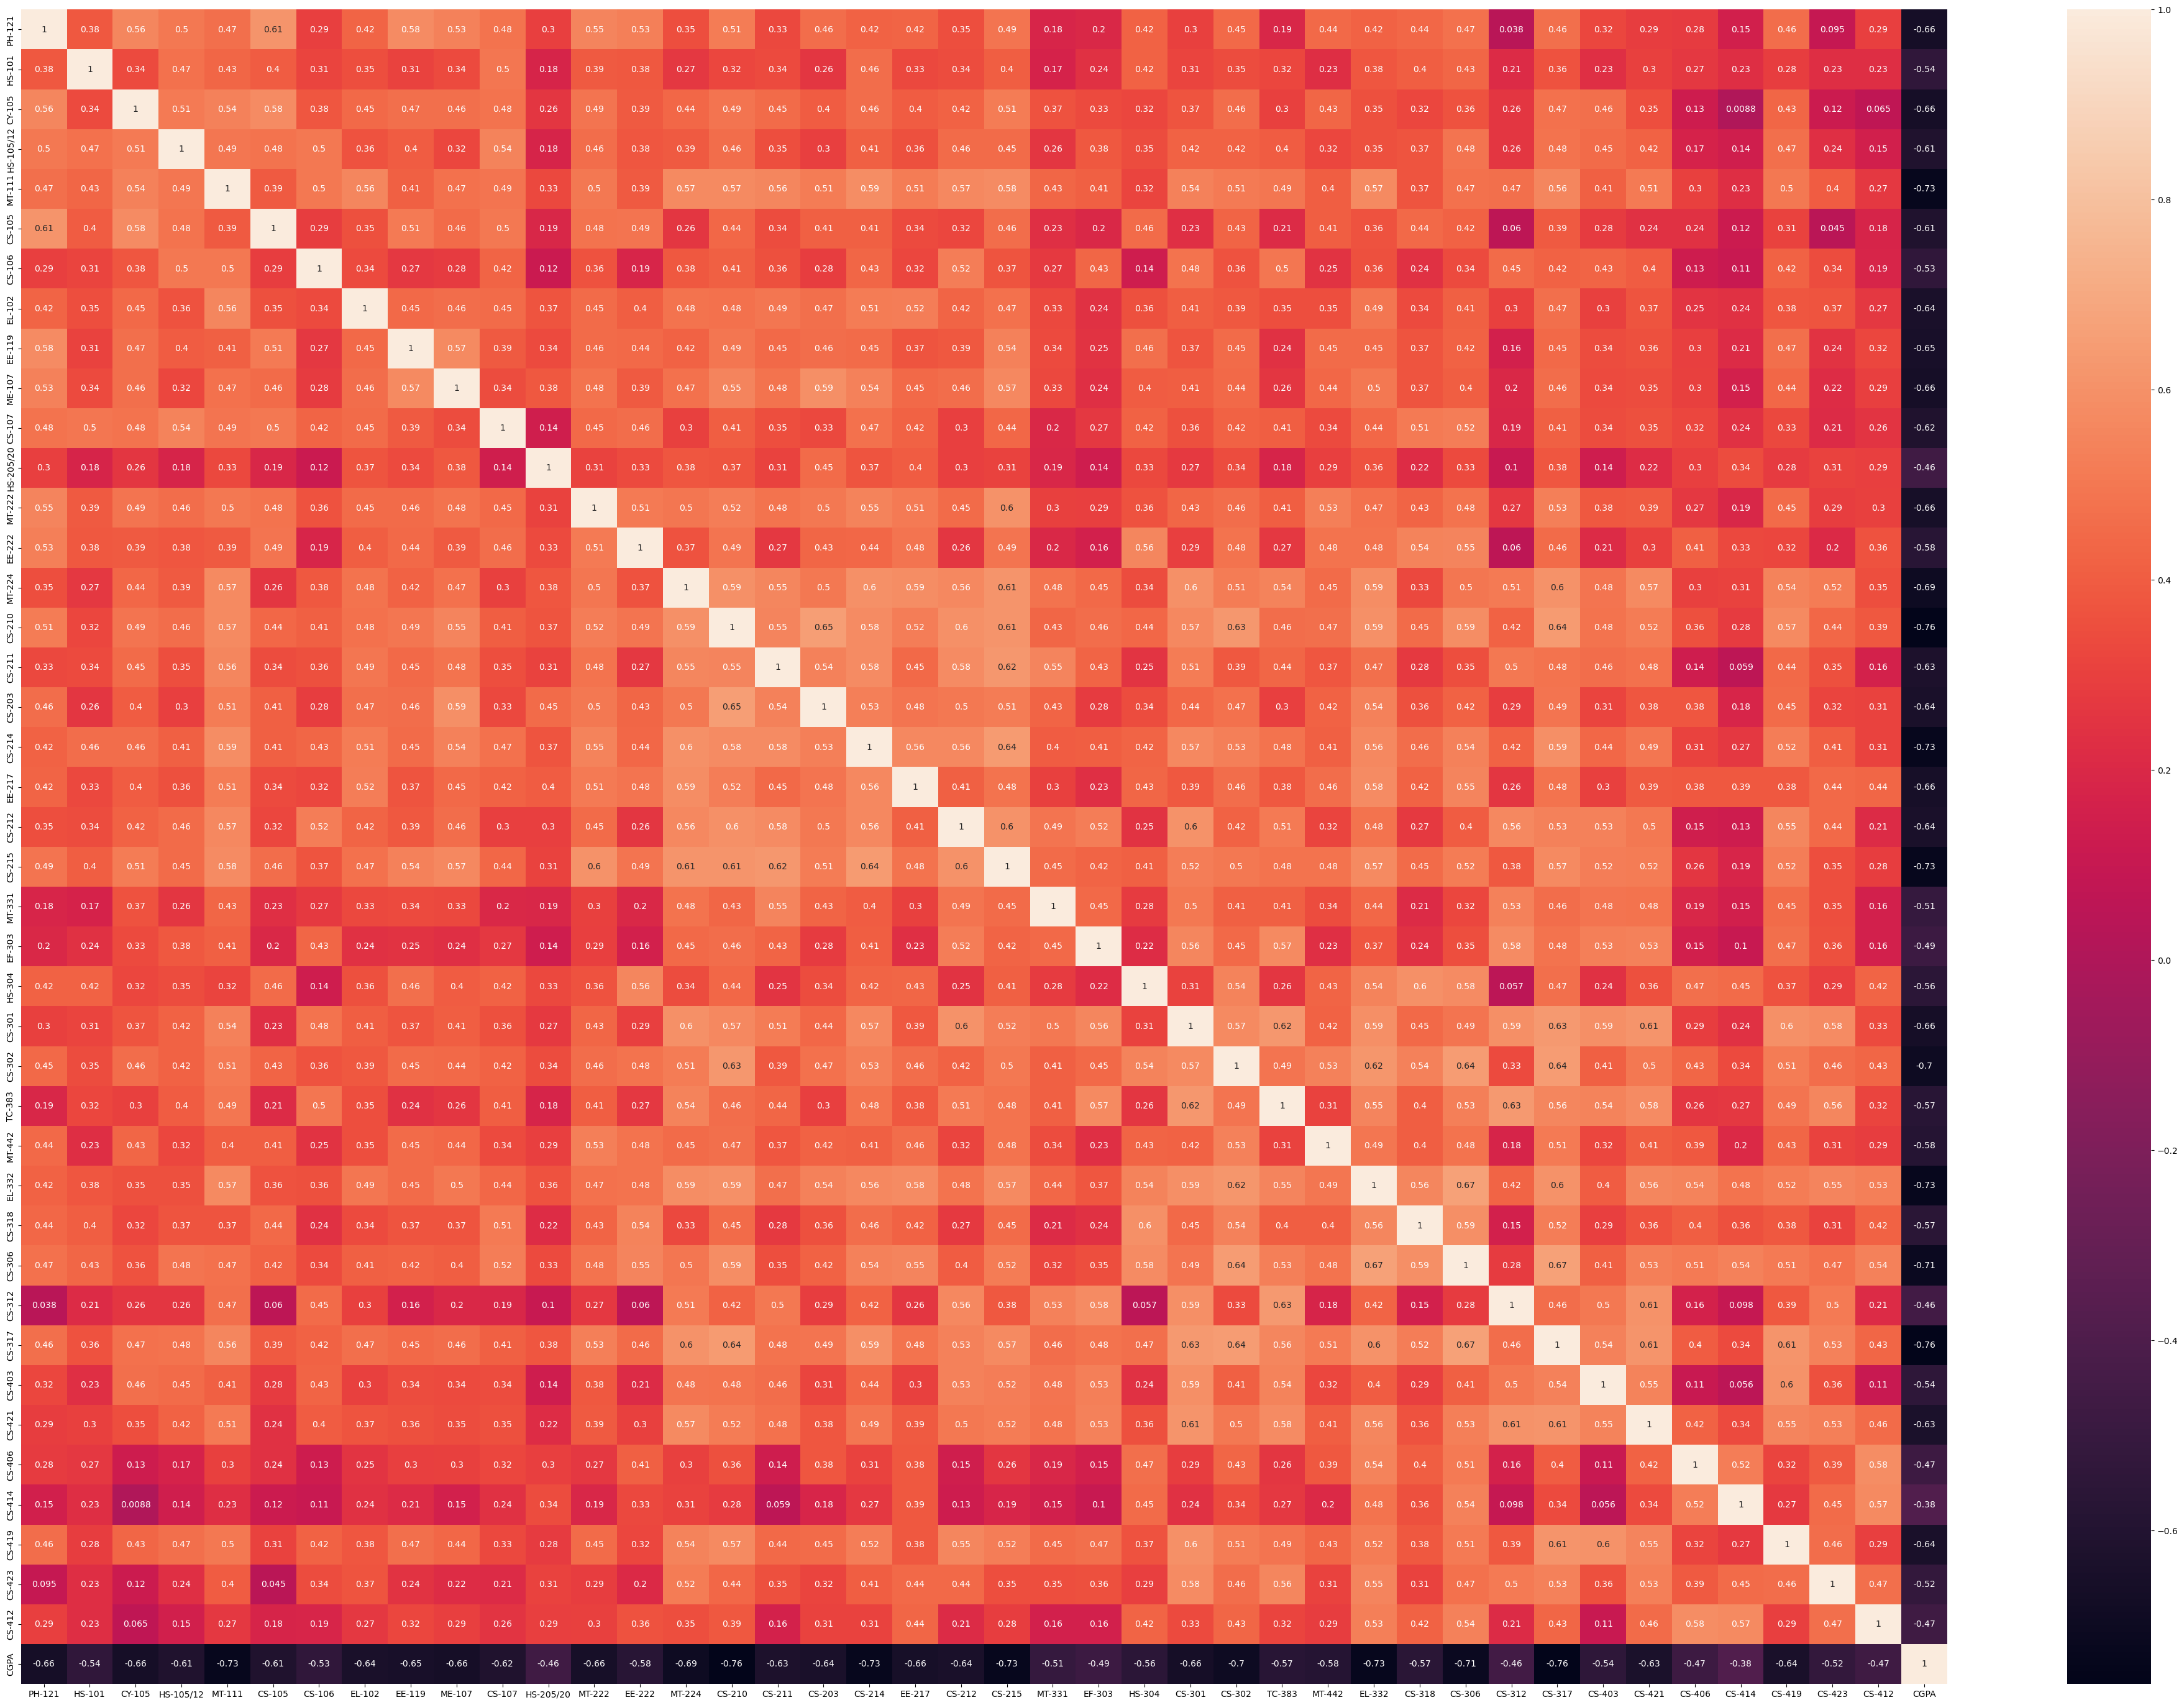

In [37]:
plt.figure(figsize=(50,35))
sns.heatmap(df.corr(),annot=True)

As we observe for CGPA column all are highly negative correlate with target variable.

Now plot correlation for features.

In [38]:
df.drop(['CGPA'],axis=1).corr()

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.382436  0.557843   0.498561  0.468968  0.609990   
HS-101     0.382436  1.000000  0.335074   0.473132  0.432742  0.400713   
CY-105     0.557843  0.335074  1.000000   0.510123  0.538380  0.578573   
HS-105/12  0.498561  0.473132  0.510123   1.000000  0.494731  0.482406   
MT-111     0.468968  0.432742  0.538380   0.494731  1.000000  0.393684   
CS-105     0.609990  0.400713  0.578573   0.482406  0.393684  1.000000   
CS-106     0.293963  0.312019  0.378223   0.499093  0.500729  0.286324   
EL-102     0.423942  0.349412  0.447539   0.360304  0.555895  0.353949   
EE-119     0.579964  0.309697  0.467250   0.400303  0.409161  0.507357   
ME-107     0.533558  0.336545  0.464418   0.320137  0.471685  0.455470   
CS-107     0.477761  0.495906  0.481277   0.540405  0.488977  0.503239   
HS-205/20  0.296428  0.178344  0.261281   0.179766  0.328574  0.192982   
MT-222     0.551805  0.391699  0.485371   0.459571  0.499415  0.477302   
EE-222     0.529273  0.381091  0.394398   0.379369  0.393494  0.487650   
MT-224     0.348024  0.265585  0.437339   0.392068  0.567848  0.259561   
CS-210     0.513314  0.322239  0.489937   0.462070  0.571972  0.440588   
CS-211     0.329882  0.335788  0.453911   0.352640  0.556099  0.342449   
CS-203     0.462853  0.263205  0.400036   0.295711  0.512505  0.410614   
CS-214     0.421076  0.461156  0.463044   0.413251  0.587102  0.414244   
EE-217     0.423468  0.328305  0.398219   0.357855  0.514243  0.339227   
CS-212     0.351823  0.340568  0.420848   0.455820  0.565169  0.321335   
CS-215     0.486069  0.401812  0.512438   0.453450  0.577513  0.456677   
MT-331     0.183034  0.173494  0.366648   0.259306  0.431197  0.231626   
EF-303     0.196272  0.240540  0.334633   0.384338  0.410918  0.196685   
HS-304     0.420629  0.418026  0.323331   0.345015  0.315129  0.456401   
CS-301     0.300945  0.313397  0.368489   0.415815  0.538492  0.230551   
CS-302     0.448213  0.345292  0.460447   0.419373  0.507059  0.426776   
TC-383     0.189226  0.320385  0.300547   0.397499  0.493420  0.214507   
MT-442     0.443980  0.226441  0.430456   0.320701  0.404591  0.407767   
EL-332     0.419078  0.378717  0.353731   0.354519  0.567875  0.360826   
CS-318     0.441321  0.404702  0.322503   0.373775  0.370270  0.444708   
CS-306     0.472384  0.432533  0.362537   0.484828  0.474400  0.418766   
CS-312     0.038184  0.213380  0.261555   0.263143  0.467946  0.059711   
CS-317     0.464022  0.364250  0.472137   0.478816  0.555098  0.387639   
CS-403     0.321264  0.229546  0.464575   0.451907  0.410540  0.279329   
CS-421     0.290351  0.301934  0.349827   0.415946  0.511463  0.236345   
CS-406     0.280166  0.265551  0.129957   0.168150  0.300391  0.237615   
CS-414     0.152437  0.225977  0.008774   0.142806  0.228637  0.121965   
CS-419     0.462770  0.284668  0.430053   0.465352  0.502473  0.306827   
CS-423     0.094921  0.228103  0.120885   0.235029  0.400679  0.045134   
CS-412     0.293815  0.226039  0.064912   0.153293  0.269792  0.179777   

             CS-106    EL-102    EE-119    ME-107  ...    CS-306    CS-312  \
PH-121     0.293963  0.423942  0.579964  0.533558  ...  0.472384  0.038184   
HS-101     0.312019  0.349412  0.309697  0.336545  ...  0.432533  0.213380   
CY-105     0.378223  0.447539  0.467250  0.464418  ...  0.362537  0.261555   
HS-105/12  0.499093  0.360304  0.400303  0.320137  ...  0.484828  0.263143   
MT-111     0.500729  0.555895  0.409161  0.471685  ...  0.474400  0.467946   
CS-105     0.286324  0.353949  0.507357  0.455470  ...  0.418766  0.059711   
CS-106     1.000000  0.338645  0.269895  0.281233  ...  0.338987  0.450752   
EL-102     0.338645  1.000000  0.448908  0.461690  ...  0.411977  0.301324   
EE-119     0.269895  0.448908  1.000000  0.572964  ...  0.419649  0.156809   
ME-107     0.281233  0.461690  0.572964  1.000000  ...  0.401833  0.199848   
CS-107     0.422237  0.454290  0.390834  0.341

<AxesSubplot:>

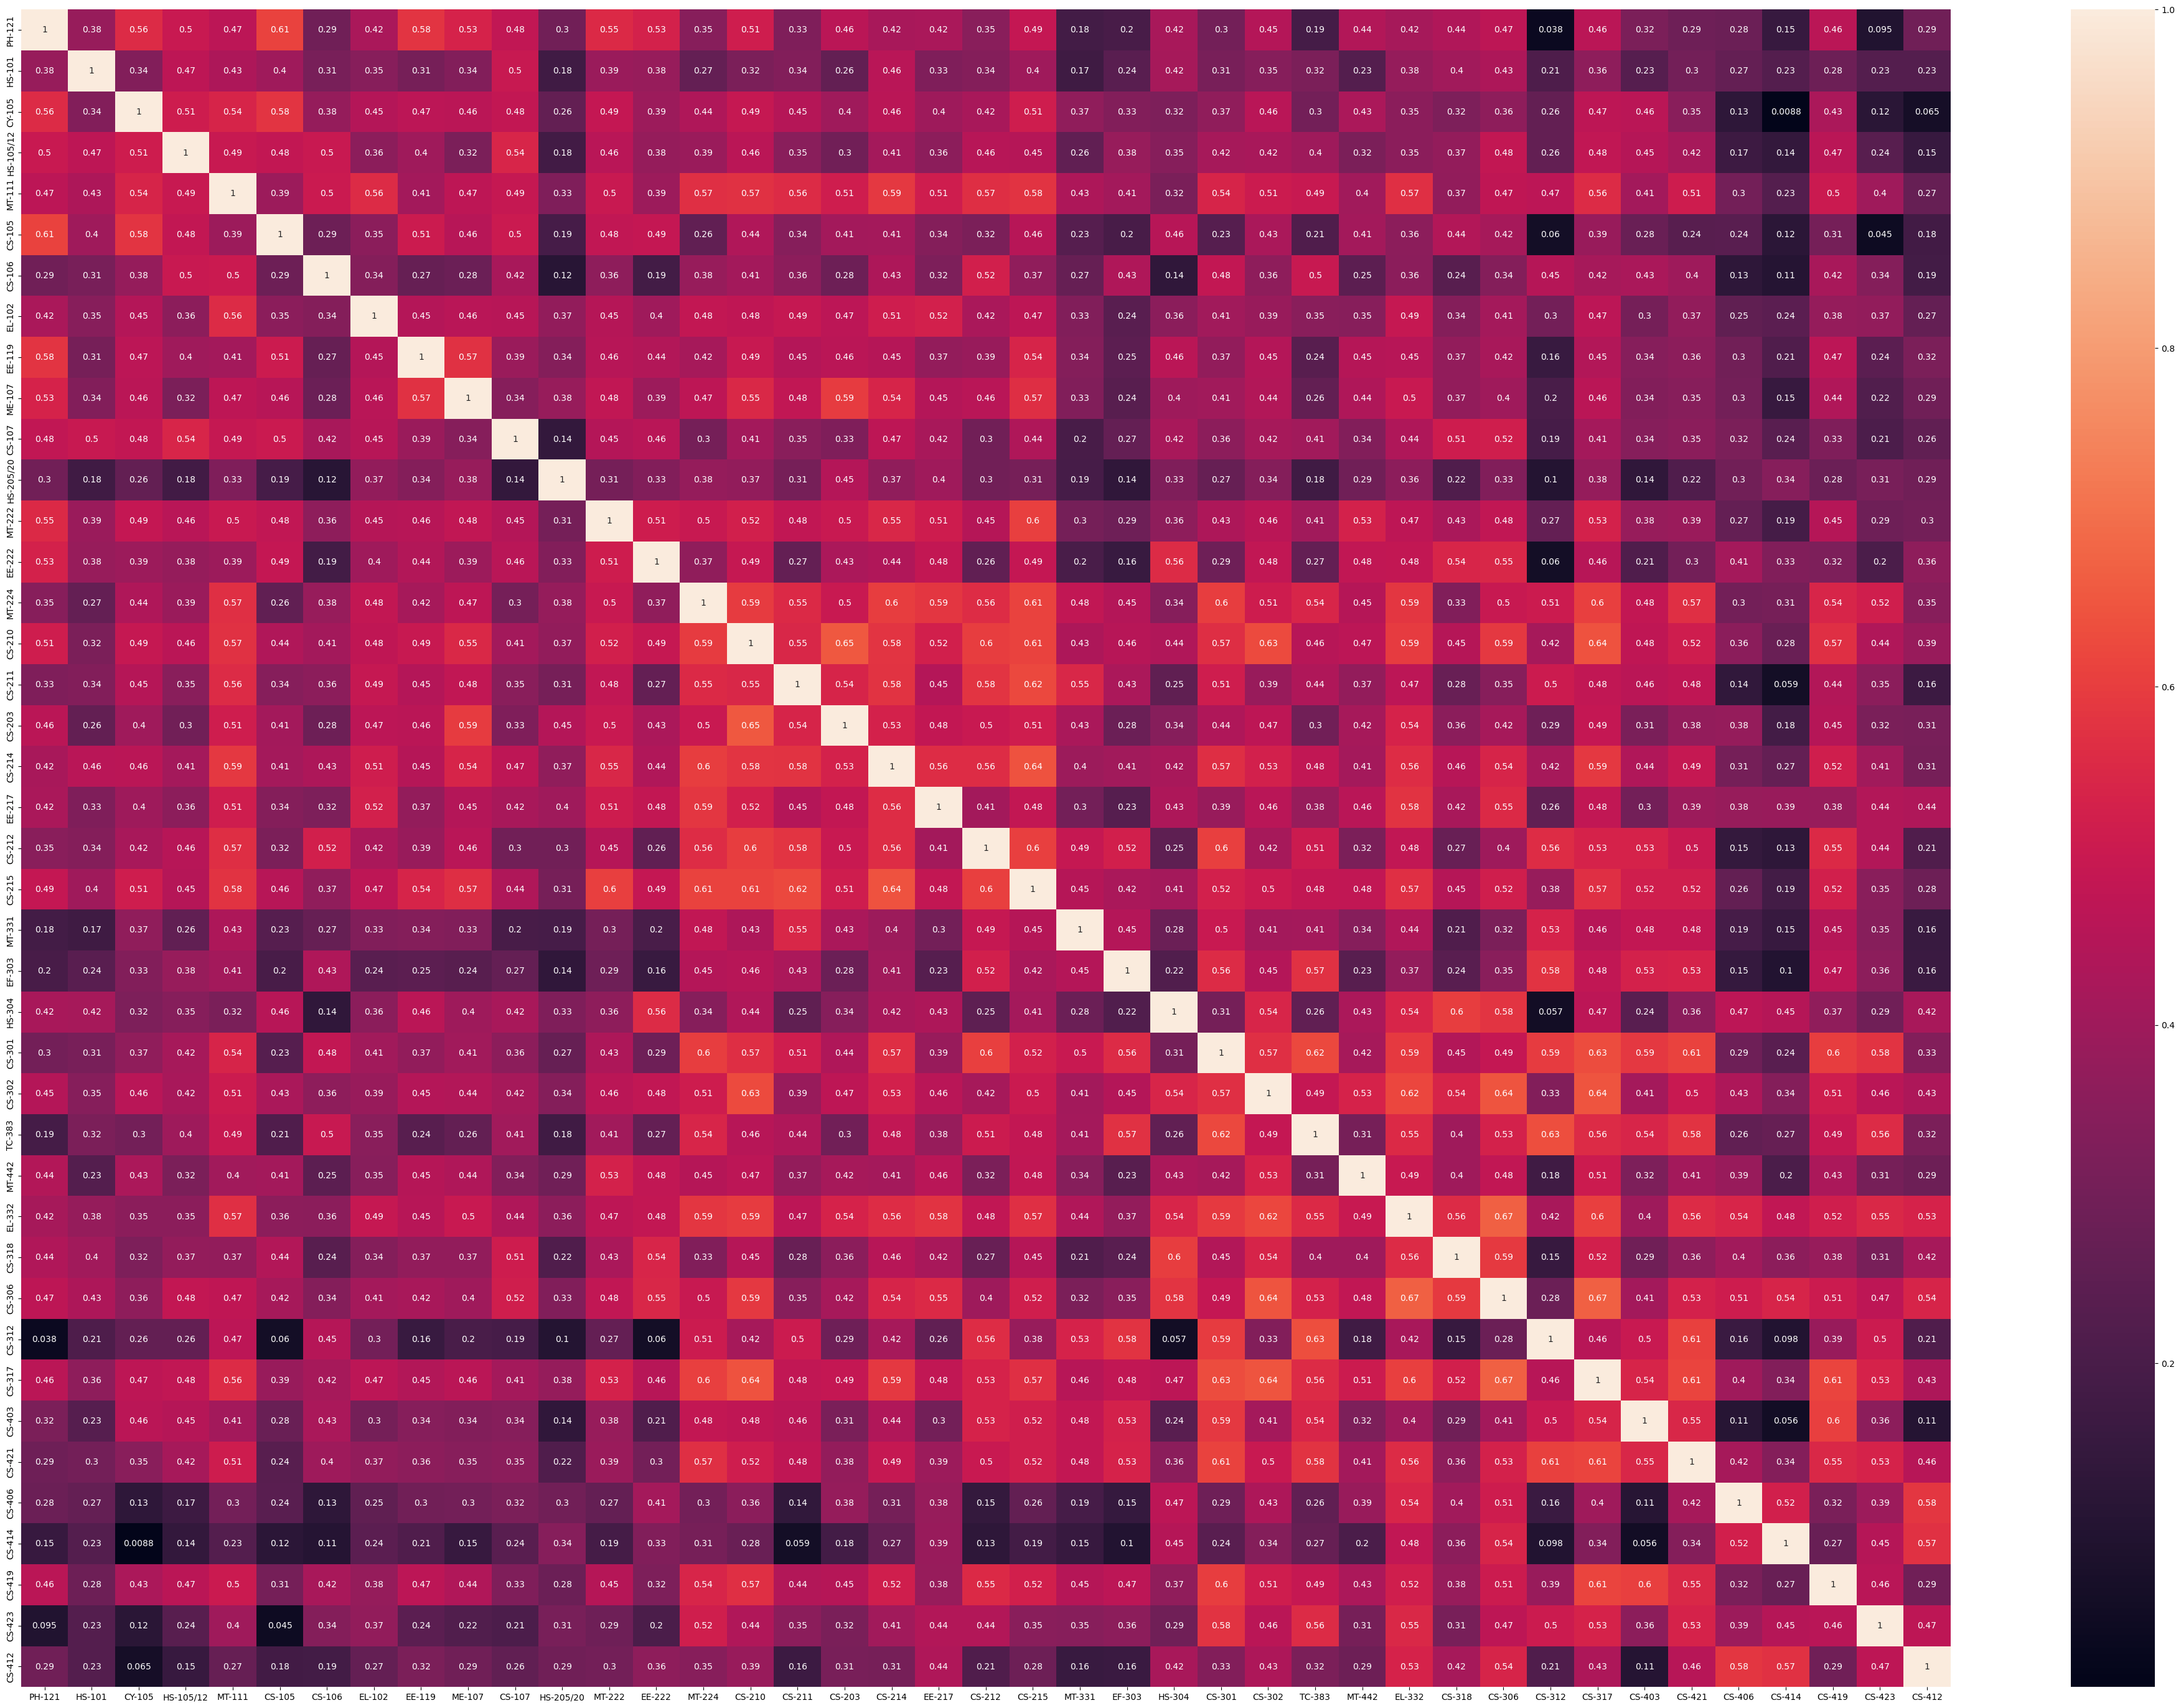

In [39]:
plt.figure(figsize=(50,35))
sns.heatmap(df.drop(['CGPA'],axis=1).corr(),annot=True)

Now we observe that all the columns are majority correlate with each other this is due to because the target variable is our CGPA and CGPA is based on the subjects marks so for that these all are mainly positively correlate with each others.

# Model Building

Seperating Features and Target

In [40]:
x=df.drop(['CGPA'],axis=1)
y=df['CGPA']

# Scaling  data

In [41]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.40040198,  1.77089951,  1.72226058, ...,  1.74051347,
        -0.34612103, -0.45017773],
       [-1.24205154,  1.4115592 ,  2.39744822, ...,  0.90041779,
         0.72798282, -0.02104337],
       [-1.24205154, -0.74448263, -0.97848996, ..., -1.61986925,
        -0.70415565, -1.30844646],
       ...,
       [-0.25657943, -1.82250355, -0.30330233, ...,  0.06032211,
        -0.70415565, -0.45017773],
       [-1.24205154, -0.38514232,  2.0598544 , ..., -0.35972573,
         0.3699482 ,  1.26635973],
       [ 0.72889268,  1.4115592 ,  2.0598544 , ...,  0.06032211,
         1.80208667,  2.12462846]])

Since we observe that our target variable is in float type so we should use regression model.
As we observe in our features columns they are large numbers so we use PCA first train with all columns and then use pca and compare both then deside which one is best.

In [45]:
lr=LinearRegression()

In [46]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model perform very well')
        print('Random State = ',i)
        print("Training r2_score is = ",r2_score(y_train,pred_train))
        print("Test r2_score is = ",r2_score(y_test,pred_test))
        print('\n')

At random state 63 The model perform very well
Random State =  63
Training r2_score is =  0.9294529324234269
Test r2_score is =  0.9286581044339473


At random state 322 The model perform very well
Random State =  322
Training r2_score is =  0.9276191077159898
Test r2_score is =  0.9280439258348242


At random state 378 The model perform very well
Random State =  378
Training r2_score is =  0.9292393416180582
Test r2_score is =  0.9289047623283839


At random state 498 The model perform very well
Random State =  498
Training r2_score is =  0.9292380665996508
Test r2_score is =  0.9289632248196225


At random state 565 The model perform very well
Random State =  565
Training r2_score is =  0.9283146415220901
Test r2_score is =  0.9284620173537437


At random state 649 The model perform very well
Random State =  649
Training r2_score is =  0.9292570949084771
Test r2_score is =  0.9288752220716022


At random state 777 The model perform very well
Random State =  777
Training r2_score is =

As we observe at random state 565 has least differance so we use this randomstate.

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=565,test_size=0.25)

In [48]:
# Fit the linear regression model
lr.fit(x_train, y_train)

# Make predictions on the test set
pred_test_lr = lr.predict(x_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, pred_test_lr)
mae = mean_absolute_error(y_test, pred_test_lr)
mse = mean_squared_error(y_test, pred_test_lr)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("R2 Score: {:.2f}%".format(r2 * 100))
print("Mean Absolute Error: {:.4f}".format(mae))
print("Mean Squared Error: {:.4f}".format(mse))
print("Root Mean Squared Error: {:.4f}".format(rmse))


Evaluation Metrics:
R2 Score: 92.85%
Mean Absolute Error: 0.0989
Mean Squared Error: 0.0268
Root Mean Squared Error: 0.1637


As we observe for LinearRegression we are get 92.85% r2_score and very less amount of all the error such as mean_absolute_error = 0.0989, mean_squared_error = 0.0268, root_mean_squared_error = 0.1637

Now check Cross val score.

In [49]:
from sklearn.model_selection import cross_val_score
pred_lr_ac=r2_score(y_test,pred_test_lr)
for i in range(2,15):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_lr_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 82.31612776236578
Accuracy score is = 92.84620173537436


At cv = 3
Cross validation score is = 88.60513930214141
Accuracy score is = 92.84620173537436


At cv = 4
Cross validation score is = 84.61929786927857
Accuracy score is = 92.84620173537436


At cv = 5
Cross validation score is = 90.34513625626616
Accuracy score is = 92.84620173537436


At cv = 6
Cross validation score is = 90.38495956275058
Accuracy score is = 92.84620173537436


At cv = 7
Cross validation score is = 90.1793106938204
Accuracy score is = 92.84620173537436


At cv = 8
Cross validation score is = 90.30023319614953
Accuracy score is = 92.84620173537436


At cv = 9
Cross validation score is = 90.66157454428857
Accuracy score is = 92.84620173537436


At cv = 10
Cross validation score is = 90.83070308162753
Accuracy score is = 92.84620173537436


At cv = 11
Cross validation score is = 91.01651263956263
Accuracy score is = 92.84620173537436


At cv = 12
Cross validation score is = 

As we observe for cv=11 we get least diffent between Cross validation score and r2_score so we use cv=11.

In [50]:
lsscore_selected=cross_val_score(lr,x,y,cv=11)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_lr_ac*100)

Cross validation score = 91.01651263956263 
 r2_score = 92.84620173537436


# Hyper Parameter

In [54]:
grid_paramlr={
    
    'fit_intercept':[True,False],
    'copy_X' : [True,False],
    'positive' :[True,False]
}

In [55]:
#gridsearch cv
gd_lr=GridSearchCV(estimator=lr,n_jobs=-1,
                  param_grid=grid_paramlr,
                  scoring='accuracy',
                  cv=11)

In [56]:
#now fit this is parameter in our model
gd_lr.fit(x,y)

GridSearchCV(cv=11, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='accuracy')

Now in our model all hyper parameters are appliyed now chek best parameter.

In [57]:
best_parameters=gd_lr.best_params_
print(best_parameters)

{'copy_X': True, 'fit_intercept': True, 'positive': True}


Now check r2_score and cross-val-score

In [59]:
lrh = LinearRegression(copy_X=True, fit_intercept=True)

In [60]:
# Fit the LinearRegression model
lrh.fit(x_train, y_train)

# Make predictions on the test set
pred_test_lrh = lrh.predict(x_test)

# Calculate evaluation metrics
r2_lrh = r2_score(y_test, pred_test_lrh)
mae_lrh = mean_absolute_error(y_test, pred_test_lrh)
mse_lrh = mean_squared_error(y_test, pred_test_lrh)
rmse_lrh = np.sqrt(mse_lrh)

# Print the evaluation metrics for LinearRegression
print("Evaluation Metrics for LinearRegression:")
print("R2 Score: {:.2f}%".format(r2_lrh * 100))
print("Mean Absolute Error: {:.4f}".format(mae_lrh))
print("Mean Squared Error: {:.4f}".format(mse_lrh))
print("Root Mean Squared Error: {:.4f}".format(rmse_lrh))


Evaluation Metrics for LinearRegression:
R2 Score: 92.85%
Mean Absolute Error: 0.0989
Mean Squared Error: 0.0268
Root Mean Squared Error: 0.1637


Same output before and now no need to check cross - val - score because it is same.

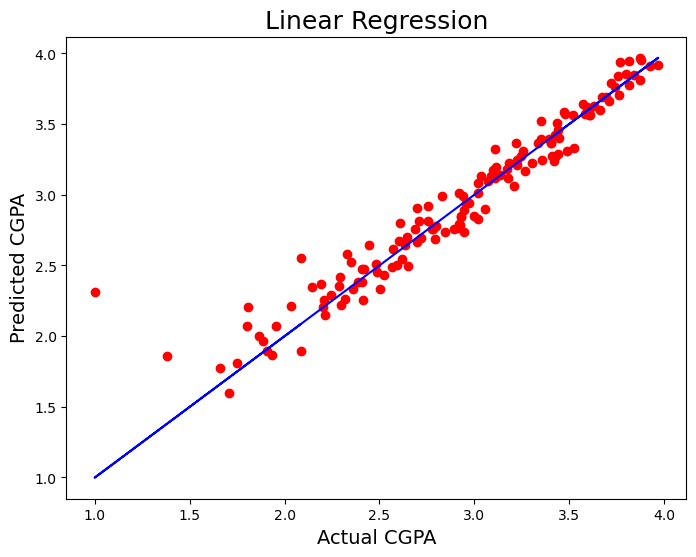

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_lrh,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual CGPA',fontsize=14)
plt.ylabel('Predicted CGPA',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lrh.png')
plt.show()